<a href="https://colab.research.google.com/github/drbarak/Project2_EDA/blob/main/Project2_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Read CSV

Source of data: https://www.kaggle.com/sakshigoyal7/credit-card-customers
Explanation of fields in data base: https://leaps.analyttica.com/sample_cases/11

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
#%matplotlib inline
import seaborn as sns
import numpy as np
from pandas_profiling import ProfileReport
from IPython.display import display
p = print
d = display

In [6]:
try:
  df = pd.read_csv('BankChurners.csv')
except:
  from google.colab import files
  uploaded = files.upload()
  df = pd.read_csv('BankChurners.csv')
  
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],
      dtype='object')

Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1',
       'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'

In [7]:
df.rename(columns={df.columns[-2]: 'Naive1', df.columns[-1]: 'Naive2'}, inplace=True)
df_naive = df[['Attrition_Flag', 'Naive1', 'Naive2']]
df_naive[df.Attrition_Flag == 'Attrited Customer']

,Attrition_Flag,Naive1,Naive2
21,Attrited Customer,0.99616,0.003836
39,Attrited Customer,0.99780,0.002197
51,Attrited Customer,0.99028,0.009720
54,Attrited Customer,0.99671,0.003294
61,Attrited Customer,0.99823,0.001771
...,...,...,...
10119,Attrited Customer,0.99691,0.003088
10123,Attrited Customer,0.99527,0.004729
10124,Attrited Customer,0.99788,0.002118
10125,Attrited Customer,0.99671,0.003294


## Drop last 2 columns

In [8]:
df.drop(df.columns[-2:], axis=1, inplace=True)
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [9]:
df.rename(columns={'CLIENTNUM': 'Client_num'}, inplace=True)

## change all columns to all lowercase

In [10]:
df.columns = df.columns.str.lower()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   client_num                10127 non-null  int64  
 1   attrition_flag            10127 non-null  object 
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

In [12]:
df.client_num.nunique()

10127

## Make client_num index

In [13]:
df.set_index('client_num', inplace=True)

In [14]:
df.head()

,attrition_flag,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
client_num,,,,,,,,,,,,,,,,,,,,
768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [15]:
df.education_level.value_counts()

Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: education_level, dtype: int64

# QUESTION: There are 1519 unknown education and 749 marital_status, 1112 income_category. What do we do with it

## Value_counts for all fields

In [16]:
for c in df.columns:
  p(df[[c]].value_counts())
  print()

attrition_flag   
Existing Customer    8500
Attrited Customer    1627
dtype: int64

customer_age
44              500
49              495
46              490
45              486
47              479
43              473
48              472
50              452
42              426
51              398
53              387
41              379
52              376
40              361
39              333
54              307
38              303
55              279
56              262
37              260
57              223
36              221
35              184
58              157
59              157
34              146
60              127
33              127
32              106
65              101
62               93
61               93
31               91
26               78
30               70
63               65
29               56
64               43
27               32
28               29
67                4
66                2
68                2
70                1
73                1
dty

# Avg_Utilization_Ratio 
It is the ratio of (credit card spent + money withdrawal)/(Total available limit for credit card spends + Total money withdrawal limit)

https://leaps.analyttica.com/sample_cases/11



total_Relationship_Count	Num	Total no. of products held by the customer

Total_Revolving_Bal	Num	THE AMOUNT THAT A CUSTOMER DON'T PAY ON TIME

Looking at the distribution plot of the Months on book there is a weird concentration in 36 months, does any one know a reason for this?

Is there a relation between non usage of the card to attrition

## Change column Attrition_Flag to 'churn' with 1 for yes and 0 for no (stayed with the card company)

In [17]:
df.rename(columns={'attrition_flag': 'churn'}, inplace=True)

In [18]:
df.churn = df['churn'].apply(lambda x: 0 if x == 'Existing Customer' else 1)
df.churn.value_counts()

0    8500
1    1627
Name: churn, dtype: int64

## Change column Gender to 'female' with 1 for yes and 0 for no

In [19]:
df.rename(columns={'gender': 'female'}, inplace=True)
df.female = df['female'].apply(lambda x: 1 if x == 'F' else 0)
num_f, num_m = df.female.value_counts()
df.female.value_counts()

1    5358
0    4769
Name: female, dtype: int64

## Change column customer_age to 'age' 

In [20]:
df.rename(columns={'customer_age': 'age'}, inplace=True)

## Change column education_level to 'education' and numeric as per table below

In [21]:
eds = ['Unknown', 'Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate','Doctorate']
df.rename(columns={'education_level': 'education'}, inplace=True)
df.education = df['education'].apply(lambda x: eds.index(x))
df.education.value_counts()

4    3128
2    2013
0    1519
1    1487
3    1013
5     516
6     451
Name: education, dtype: int64


```
education_level
Graduate           3128
High School        2013
Unknown            1519
Uneducated         1487
College            1013
Post-Graduate       516
Doctorate           451
```




## Change column marital_status to numeric as per table below



```
marital_status
Married           4687
Single            3943
Unknown            749
Divorced           748

marital_status
Married           2
Single            1
Unknown            0
Divorced           3
```



In [22]:
maritals = ['Unknown', 'Single', 'Married', 'Divorced']
df.marital_status = df['marital_status'].apply(lambda x: maritals.index(x))
df.marital_status.value_counts()

2    4687
1    3943
0     749
3     748
Name: marital_status, dtype: int64

## Change column income_category to numeric as per table below



```
income_category
Less than $40K     3561
$40K - $60K        1790
$80K - $120K       1535
$60K - $80K        1402
Unknown            1112
$120K +             727
```



In [23]:
incs = ['Unknown','Less than $40K', '$40K - $60K', '$80K - $120K', '$60K - $80K', '$120K +']
df.income_category = df['income_category'].apply(lambda x: incs.index(x))
df.income_category.value_counts()

1    3561
2    1790
3    1535
4    1402
0    1112
5     727
Name: income_category, dtype: int64

## Change card_category to 'card' with numeric as per table below



```
card_category
Blue             9436
Silver            555
Gold              116
Platinum           20
```



In [24]:
cards = ['', 'Blue', 'Silver', 'Gold', 'Platinum']
df.rename(columns={'card_category': 'card'}, inplace=True)
df.card = df['card'].apply(lambda x: cards.index(x))

  # can use map
#d = {'Blue' : 1, 'Silver' : 2, 'Gold': 3, 'Platinum': 4}
#df.card = df['card'].map(d)

  # or replace
#df = df.replace({'card': d})

df.card.value_counts()

1    9436
2     555
3     116
4      20
Name: card, dtype: int64

## Verify all fields are numeric

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 768805383 to 714337233
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn                     10127 non-null  int64  
 1   age                       10127 non-null  int64  
 2   female                    10127 non-null  int64  
 3   dependent_count           10127 non-null  int64  
 4   education                 10127 non-null  int64  
 5   marital_status            10127 non-null  int64  
 6   income_category           10127 non-null  int64  
 7   card                      10127 non-null  int64  
 8   months_on_book            10127 non-null  int64  
 9   total_relationship_count  10127 non-null  int64  
 10  months_inactive_12_mon    10127 non-null  int64  
 11  contacts_count_12_mon     10127 non-null  int64  
 12  credit_limit              10127 non-null  float64
 13  total_revolving_bal       10127 non-null  int64  

# Plot pair relations of all columns

When we plot all the pairs, each plot is too small - need to limit it to few pairs

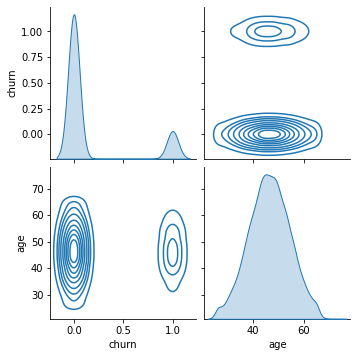

In [26]:
sns.pairplot(data=df, kind='kde', vars=['churn','age'])

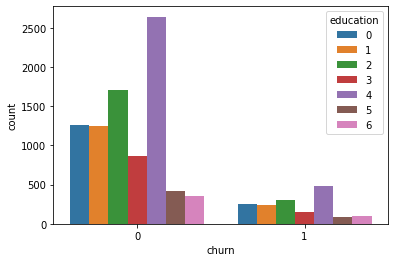

In [27]:
sns.countplot(x='churn',hue='education',data=df)
plt.show()

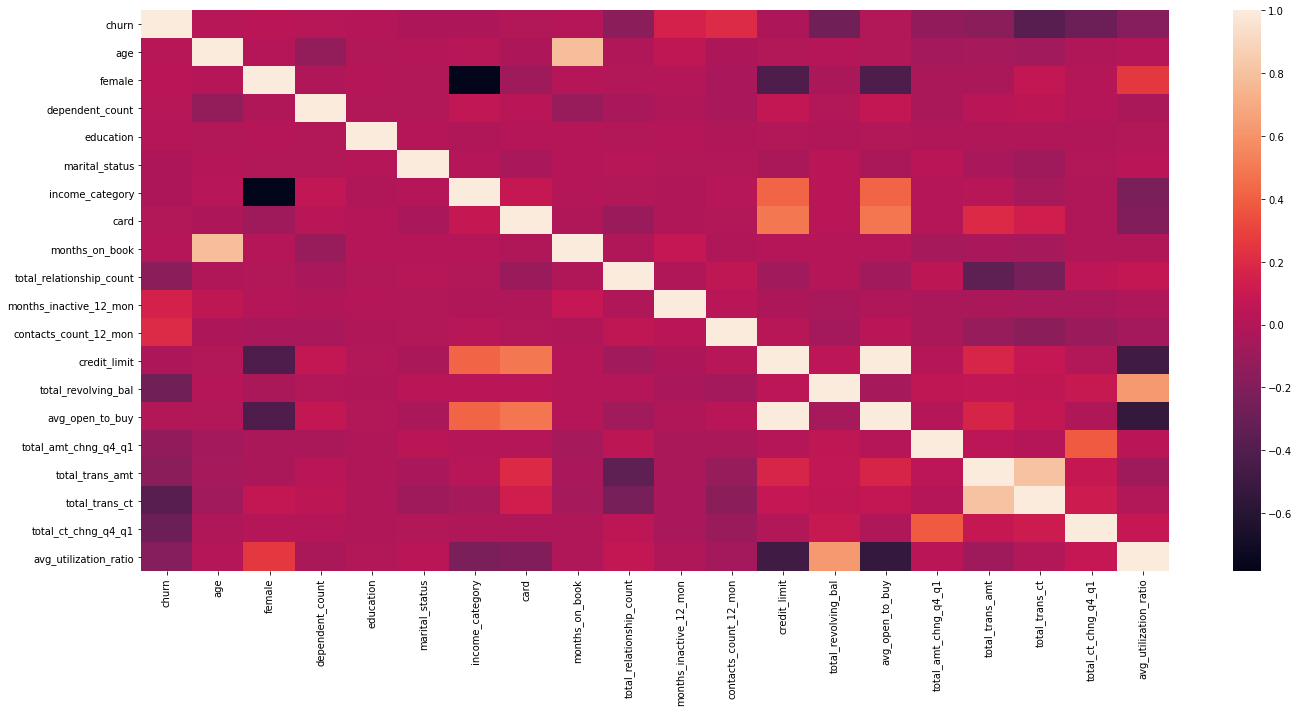

In [28]:
fig = plt.figure(figsize=(20, 10), tight_layout=True)
sns.heatmap(df.corr())
plt.show()

# FUNCTION display_corr()

In [29]:
#import mplcursors  - not working in colab
%matplotlib inline

In [30]:
n_colors = 256 # Use 256 colors for the diverging color palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette

def value_to_color(val):
    # step 4 - add colors

    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

def heatmap(x, y, size, color):
    # Step 1
    n = np.sqrt(len(x))
    fig = plt.figure(figsize=(max(4, n), max(4, n / 2)))
    #ax = fig.gca()

    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x15 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the leftmost 14 columns of the grid for the main plot

    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]

    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 
    
    size_scale = 500
    ax.scatter(
        x=x.map(x_to_num), # Use mapping for x
        y=y.map(y_to_num), # Use mapping for y
        s=size * size_scale, # Vector of square sizes, proportional to size parameter
        c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
        marker='s' # Use square as scatterplot marker
    )
    
    # Show column labels on the axes
    ax.set_xticks([x_to_num[v] for v in x_labels])
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    ax.set_yticks([y_to_num[v] for v in y_labels])
    ax.set_yticklabels(y_labels)

    # Step 2
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    # Step 3
    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])

    # Step 5
    # Add color legend on the right side of the plot
    ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

    col_x = [0]*len(palette) # Fixed x coordinate for the bars
    bar_y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

    bar_height = bar_y[1] - bar_y[0]
    ax.barh(
        y=bar_y,
        width=[5]*len(palette), # Make bars 5 units wide
        left=col_x, # Make bars start at 0
        height=bar_height,
        color=palette,
        linewidth=0
    )
    ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
    ax.grid(False) # Hide grid
    ax.set_facecolor('white') # Make background white
    ax.set_xticks([]) # Remove horizontal ticks
    ax.set_yticks(np.linspace(min(bar_y), max(bar_y), 3)) # Show vertical ticks for min, middle and max
    ax.yaxis.tick_right() # Show vertical ticks on the right 

    #mplcursors.cursor().connect("add", lambda sel: sel.annotation.set_text(color[sel.target.index]))
    plt.show()

In [31]:
clear_opts = ['diagonal', 'upperleft', 'lowerleft', 'upperleftdiagonal', 'lowerleftdiagonal',
                'upperright', 'lowerright', 'upperrightdiagonal', 'lowerrightdiagonal',
                'diagonalleft','diagonalright']
def clear_corr(df, clear, display_table=True):
  clear_opt = 0
  if clear and clear.lower() in clear_opts:
    clear_opt = clear_opts.index(clear.lower()) + 1

  #corr = df[df.columns].corr()  # n columns makes n * n correlations values
  corr = df.corr()
  if clear_opt:
    corr = corr[sorted(df.columns, reverse=True)]
    corr = corr.loc[sorted(df.columns, reverse=False)]
    n = len(corr.columns)
    diag = 0 if clear_opt in [1,4,3,8,9,10,11] else 1
    for i in range(n):
      if clear_opt in [10]:    # diagonalleft
        corr.iloc[i, i + diag] = 0
      elif clear_opt in [6,8]:  # upperright, upperrightdiagonal 
        corr.iloc[i, i + diag:n] = 0
      elif clear_opt in [3,5]:  # lowerleft, lowerleftdiagonal
        corr.iloc[i, 0:i + diag] = 0
      elif clear_opt in [2,4]:  # upperleft, upperleftdiagonal
        corr.iloc[i, 0: n - i - diag] = 0
      elif clear_opt in [1, 11]:  # diagonal, diagonalright
        corr.iloc[i, n - i - 1] = 0
      elif clear_opt in [7,9]:  # lowerright, lowerrightdiagonal
        corr.iloc[i, n - i + diag - 1: n] = 0
  if display_table:
    display(corr.head())
  return corr

In [32]:
def display_corr(df, clear='diagonal', display_table=True):
  # first remove all non numeric columns
  s = df.dtypes[df.dtypes != 'int64'][df.dtypes != 'float64'][df.dtypes != 'bool']
  if len(s) > 0:
    print('NOTE: the following non-numeric columns where not included in the plot:')
    print('\t',list(s.index))
    print()
  corr = df
  for c in s.index:
    corr = corr.drop(c, axis=1)
    
  corr = clear_corr(corr, clear, display_table)
  corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
  corr.columns = ['x', 'y', 'value']
  corr = corr.round({'value': 6})
  heatmap(x=corr['x'], y=corr['y'], size=corr['value'].abs(), color=corr.value)

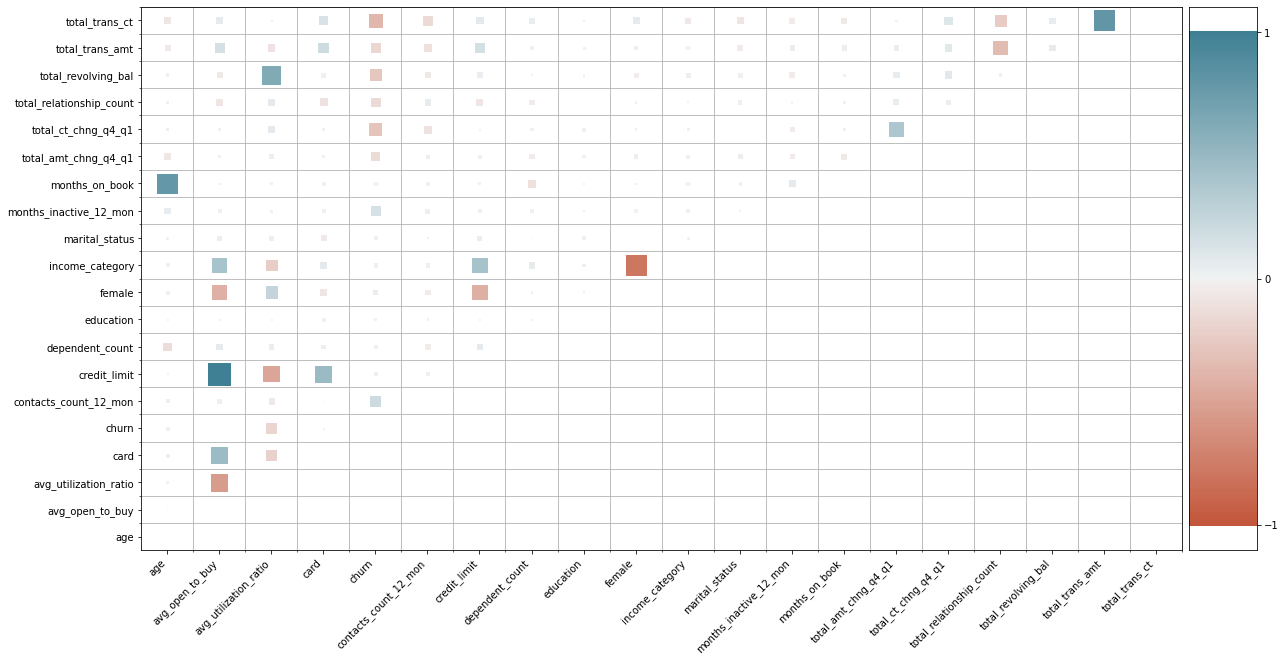

In [33]:
display_corr(df, clear='LowerRightDiagonal', display_table=False)

In [34]:
dfa = pd.read_csv('BankChurners.csv')
dfa.drop(dfa.columns[-2:], axis=1, inplace=True)
dfa.rename(columns={'CLIENTNUM': 'Client_num'}, inplace=True)
dfa.columns = dfa.columns.str.lower()
dfa.set_index('client_num', inplace=True)
dfa.rename(columns={'attrition_flag': 'churn'}, inplace=True)
dfa.churn = dfa['churn'].apply(lambda x: False if x == 'Existing Customer' else True)

# Look at the columns with unknown

In [35]:
df_partial = df[['churn', 'marital_status', 'income_category', 'education']]
df_partial.head()

,churn,marital_status,income_category,education
client_num,,,,
768805383,0,2,4,2
818770008,0,1,1,4
713982108,0,2,3,4
769911858,0,0,1,2
709106358,0,2,4,1


## correlation with unknown in the db

,marital_status,income_category,education,churn
churn,-0.018597,-0.019514,0.008796,0.000000
education,0.014875,-0.013326,0.000000,0.008796
income_category,0.010402,0.000000,-0.013326,-0.019514
marital_status,0.000000,0.010402,0.014875,-0.018597


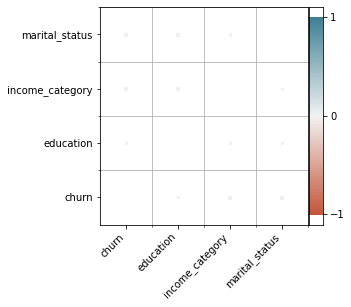

In [36]:
display_corr(df_partial, clear='diagonal')

## Drop the rows with unknown and check correlation again

No change: maybe beuse their value was 0

(10127, 4)
(7081, 4)


,marital_status,income_category,education,churn
churn,-0.018597,-0.019514,0.008796,0.000000
education,0.014875,-0.013326,0.000000,0.008796
income_category,0.010402,0.000000,-0.013326,-0.019514
marital_status,0.000000,0.010402,0.014875,-0.018597


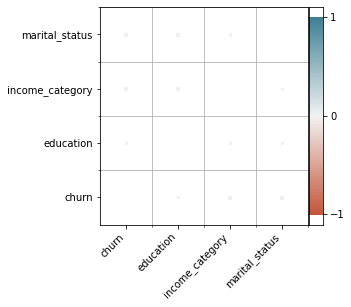

In [37]:
df_temp = df_partial.copy()
p(df_temp.shape)
#p(df_temp.education.value_counts())
df_temp = df_temp[df_temp.education > 0]
df_temp = df_temp[df_temp.marital_status > 0]
df_temp = df_temp[df_temp.income_category > 0]
p(df_temp.shape)
display_corr(df_partial)

# Profiling - not working in colab - works in Jupyter

In [38]:
from pandas_profiling import ProfileReport
#profile = ProfileReport(df)

In [39]:
df[df.months_on_book == 36].count()

churn                       2463
age                         2463
female                      2463
dependent_count             2463
education                   2463
marital_status              2463
income_category             2463
card                        2463
months_on_book              2463
total_relationship_count    2463
months_inactive_12_mon      2463
contacts_count_12_mon       2463
credit_limit                2463
total_revolving_bal         2463
avg_open_to_buy             2463
total_amt_chng_q4_q1        2463
total_trans_amt             2463
total_trans_ct              2463
total_ct_chng_q4_q1         2463
avg_utilization_ratio       2463
dtype: int64

## To display the profile report we need first to upload it

In [40]:
import IPython
from google.colab import files
def show_profile():
  try:
    with open ('credit_card_profile.html') as f:
      pass
  except:
    uploaded = files.upload()
  display(IPython.display.HTML('credit_card_profile.html'))
#show_profile() 

## From the profile report we see some outliers:

1. a lot of clients at the age around 50
2. pick of people with 36 months_on_book - maybe that when the carsd expires. We need to check if most that left are at 36 months
3. Most people paid the cards on time - total_revolving = 0
4. Pick at 2500$ for total_revolving - what does it mean? - it means they use the credit card and did not pay iy in full. probably will not leave the company because they need the card.


# Let's look at the correlation of churn with the other columns and pick those with meaningfull correlation (above 0.2 maybe?)

In [41]:
corr = df.corr()  # n columns makes n * n correlations values
p(type(corr))
p()
p(abs(corr.churn).sort_values(ascending=False))
p()
corr.churn[abs(corr.churn) > 0.2]

<class 'pandas.core.frame.DataFrame'>

churn                       1.000000
total_trans_ct              0.371403
total_ct_chng_q4_q1         0.290054
total_revolving_bal         0.263053
contacts_count_12_mon       0.204491
avg_utilization_ratio       0.178410
total_trans_amt             0.168598
months_inactive_12_mon      0.152449
total_relationship_count    0.150005
total_amt_chng_q4_q1        0.131063
female                      0.037272
credit_limit                0.023873
income_category             0.019514
dependent_count             0.018991
marital_status              0.018597
age                         0.018203
months_on_book              0.013687
education                   0.008796
card                        0.002354
avg_open_to_buy             0.000285
Name: churn, dtype: float64



churn                    1.000000
contacts_count_12_mon    0.204491
total_revolving_bal     -0.263053
total_trans_ct          -0.371403
total_ct_chng_q4_q1     -0.290054
Name: churn, dtype: float64

# FUNCTION: add_labels()

In [121]:
def add_labels(ax, stacked=False, bins=None, percent=False, fraction=False):
    # ax.patches gives list of bars that can be access using index starting at 0
    if bins is None:
      bins = len(ax.patches)
    # in case it is a stacked seaborn first plot the lower part then the higher one
    n = len(ax.patches)
    n2 = int(n / 2)
    y_min, y_max = ax.get_ylim()
      # if group of bars we need to calculate the total of the group for precentage
      # seaborn first plots all bars for the same hue, then the 2nd bar per hue and so on
    if not stacked:
      n2 = bins   # number of groups
    h_array = [[0,0] for i in range(n)]
    for i, bar in enumerate(ax.patches):  # must use a loop because ax.patches might include Nan
      if not pd.isna(bar.get_height()):
        if fraction:
          h_array[i][0] = round(bar.get_height(), 2)
        else:
          h_array[i][0] = int(bar.get_height())
    if percent:
      na = np.array(h_array)
      if n2 < n:  # multiple groups of bins
        for grp in range(n2):
          percentTot = sum(na[grp::n2, 0])
          na[grp::n2, 1] = percentTot
      else: # one group of bins
        percentTot = sum(na[:, 0])
        na[:, 1] = percentTot
      h_array = na.tolist()
    
    for i, bar in enumerate(ax.patches):
        h = h_array[i][0]
        if h == 0:
          continue
        if i < n2 or not stacked:
          if h > 0.075 * y_max:   # if the bar has  space for a label inside
            h *= 0.5  # 50% of bar
          elif h < 0.03 * y_max:
            h += 0.03 * y_max
        else:
          if h > 0.075 * y_max:   # if the top bar has space for a label inside
            h = h * 0.5 + h_array[i % n2][0]
          else:
            h += 0.06 * y_max + h_array[i % n2][0]
            if h_array[i % n2][0] < 0.02 * y_max:
              h += 0.03 * y_max
        labels = h_array[i][0]
        if percent:
          percent_ = round(labels * 100 / h_array[i][1])
          labels = f'{labels}\n{percent_}%'

        ax.text(
            bar.get_x() + bar.get_width()/2, # bar index (x coordinate of text)
            h, # y coordinate of text
            labels,  # y label
            ha='center', 
            va='center', 
            #fontweight='bold',
            #color = 'b', 
            #transform=ax.transData,   # using the values of the data on the axis (defualt)
            size=14)

## check contacts_count_12_mon

### CONCLUSION 1: Anybody that contacted 6 times in the last 12 months -> left

[[392, 399], [1391, 1499], [2824, 3227], [2699, 3380], [1077, 1392], [117, 176], [0, 54], [7, 399], [108, 1499], [403, 3227], [681, 3380], [315, 1392], [59, 176], [54, 54]]


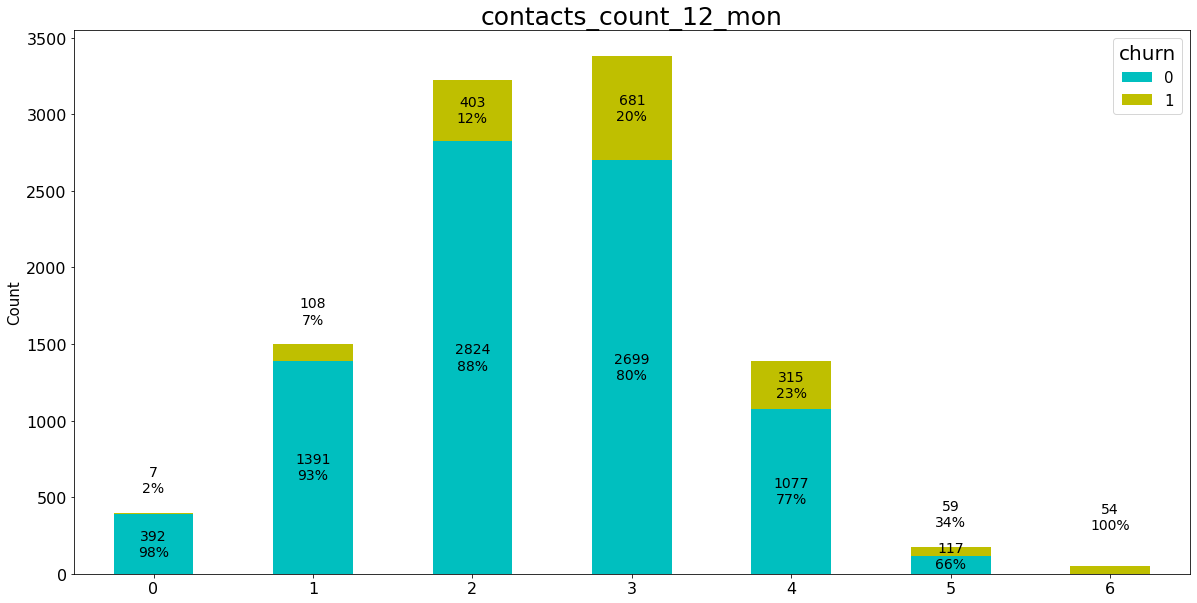

In [43]:
df_plot = df.groupby(['contacts_count_12_mon', 'churn']).size().reset_index()
df_plot = df_plot.pivot(index='contacts_count_12_mon', columns='churn', values=0)
df_plot.fillna(0, inplace=True)

fig = plt.figure(figsize=(20, 10))
ax = fig.gca()
df_plot.plot(kind='bar', stacked=True, ax=ax, fontsize=16, rot=0, color='cy')
bins = len(ax.patches) / 2
add_labels(ax, True, bins, percent=True)

plt.title('contacts_count_12_mon', fontsize=25)
plt.xlabel('')
plt.ylabel('Count', fontsize = 15)
plt.legend(title="churn", fontsize=15, title_fontsize=20)
plt.show()

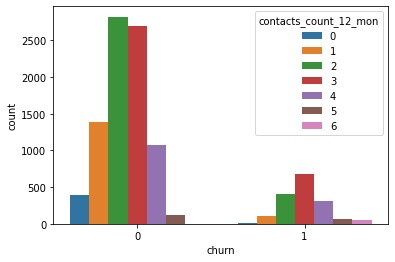

In [44]:
sns.countplot(x='churn',hue='contacts_count_12_mon',data=df)
plt.show()

## Is there a difference between male and female

check contacts_count_12_mon by gender

# FUNCTION barplot_2_categories()

In [152]:
def barplot_2_categories(df_plot_f, df_plot_m=None, title=None, title1="Female churn", title2="Male churn", show_labels=True, percent=True, ylabel='Count', fraction=False, stacked=True):
  fig = plt.figure(figsize=(20, 10))
  ax = fig.gca()
  color = 'my' if stacked else 'm'
  df_plot_f.plot(kind='bar', stacked=stacked, ax=ax, fontsize=16, rot=0, color=color, width=0.3, position=0)
  ax.legend(title=title1, fontsize=15, title_fontsize=20)

  bins = len(ax.patches)
  if stacked: bins = int(bins / 2)
  if show_labels:
    add_labels(ax, stacked, bins, percent, fraction)

  if not df_plot_m is None:
    ax2 = ax.twinx()  # so can have a 2nd legends
    ax2.set_ylim(ax.get_ylim())  # have same y scale
    ax2.set_yticks([]) 
    ax2.set_yticklabels('')
    color = 'cr' if stacked else 'c'
    df_plot_m.plot(kind='bar', stacked=True, ax=ax2, fontsize=16, rot=0, color=color, width=0.3, position=1)
    ax2.legend(title=title2, fontsize=15, title_fontsize=20, loc=2)
    if show_labels:
      add_labels(ax2, stacked, bins, percent, fraction)

  if not title is None:
    plt.title(title, fontsize=25)
  ax.set_xlabel('')
  if not ylabel is None:
    ax.set_ylabel(ylabel, fontsize = 15)

  plt.show()

[[208, 213], [794, 863], [1451, 1684], [1428, 1818], [513, 684], [34, 65], [0, 31], [5, 213], [69, 863], [233, 1684], [390, 1818], [171, 684], [31, 65], [31, 31]]
[[184, 186], [597, 636], [1373, 1543], [1271, 1562], [564, 708], [83, 111], [0, 23], [2, 186], [39, 636], [170, 1543], [291, 1562], [144, 708], [28, 111], [23, 23]]


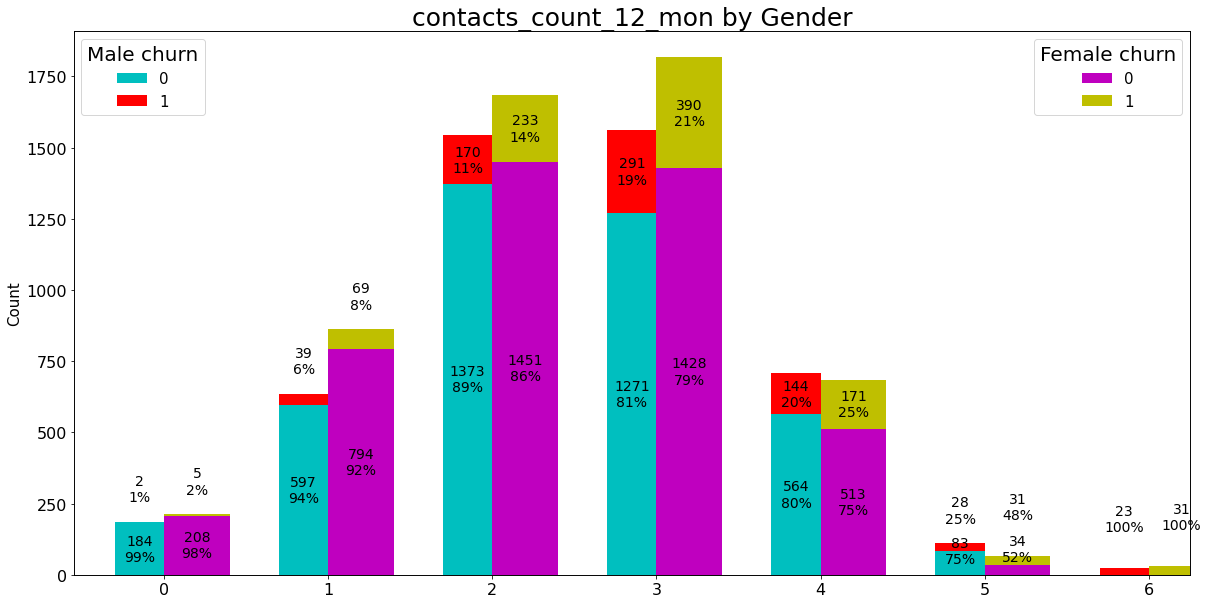

In [46]:
df_plot = df.groupby(['contacts_count_12_mon', 'female', 'churn']).size().reset_index()
df_plot = df_plot.pivot(index=['contacts_count_12_mon'], columns=['female', 'churn'], values=0)
df_plot.fillna(0, inplace=True)
df_plot_f = df_plot[(1,)]
df_plot_m = df_plot[(0,)]
barplot_2_categories(df_plot_f, df_plot_m,'contacts_count_12_mon by Gender')

## contacts_count_12_mon by Gender (per 100, to eliminate the fact that there are more female than male in the data)

[[3.88, 3.9699999999999998], [14.82, 16.11], [27.08, 31.43], [26.65, 33.93], [9.57, 12.76], [0.63, 1.21], [0.0, 0.58], [0.09, 3.9699999999999998], [1.29, 16.11], [4.35, 31.43], [7.28, 33.93], [3.19, 12.76], [0.58, 1.21], [0.58, 0.58]]
[[3.86, 3.9], [12.52, 13.34], [28.79, 32.35], [26.65, 32.75], [11.83, 14.85], [1.74, 2.33], [0.0, 0.48], [0.04, 3.9], [0.82, 13.34], [3.56, 32.35], [6.1, 32.75], [3.02, 14.85], [0.59, 2.33], [0.48, 0.48]]


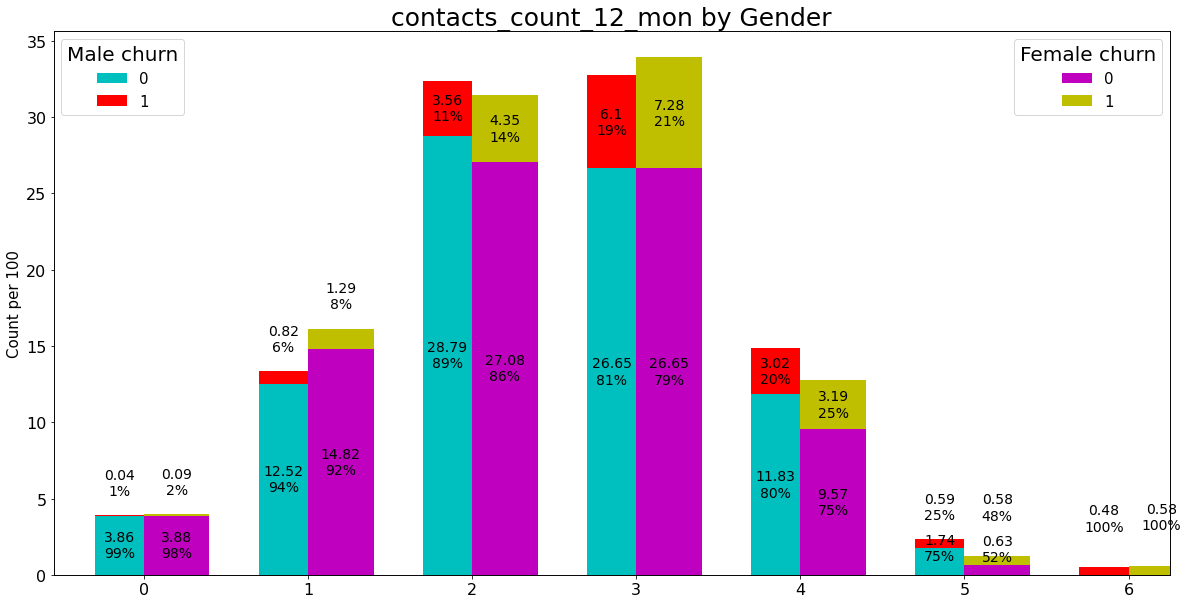

In [47]:
df_plot = df.groupby(['contacts_count_12_mon', 'female', 'churn']).size().reset_index()
df_plot = df_plot.pivot(index=['contacts_count_12_mon'], columns=['female', 'churn'], values=0)
df_plot.fillna(0, inplace=True)
df_plot_f = df_plot[(1,)] * 100 / num_f
df_plot_m = df_plot[(0,)] * 100 / num_m
barplot_2_categories(df_plot_f, df_plot_m,'contacts_count_12_mon by Gender', show_labels=True, ylabel='Count per 100', percent=True, fraction=True)

## CONCLUSION 1A: Female tends to churn more than male (percent wise and also in absolute numbers, except for minute difference at 5- 0.58 comared to 0.59)


## check total_revolving_balance

Revolving balance is the unpaid amount that carries off on your next credit card's cycle. 
Total_revolving_bal would be its sum. 

This tells us THE AMOUNT THAT A CUSTOMER DON"T PAY ON TIME.

### make bins from total_revolving_baland then plot the countplot

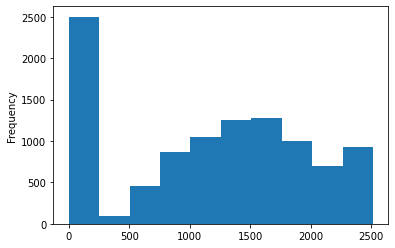

In [48]:
# make bins from the columns, each one 250$ 
# we see the needed bins from the historam
df['total_revolving_bal'].plot(kind='hist')
plt.show()

# FUNCTION makebins()

In [49]:
def makebins(col, interval, start=0):
  max_ = col.max()
  nbins = int(max_/interval) + 1 
  max250 = (nbins)*interval
  bins = np.linspace(start, max250, nbins + 1)
  #p(bins)
  return bins

In [50]:
bins = makebins(df['total_revolving_bal'], 400)
df['binned'] = pd.cut(df['total_revolving_bal'], bins, include_lowest=True)
p(df['binned'])
df.total_revolving_bal.head()

client_num
768805383      (400.0, 800.0]
818770008     (800.0, 1200.0]
713982108     (-0.001, 400.0]
769911858    (2400.0, 2800.0]
709106358     (-0.001, 400.0]
                   ...       
772366833    (1600.0, 2000.0]
710638233    (2000.0, 2400.0]
716506083     (-0.001, 400.0]
717406983     (-0.001, 400.0]
714337233    (1600.0, 2000.0]
Name: binned, Length: 10127, dtype: category
Categories (7, interval[float64]): [(-0.001, 400.0] < (400.0, 800.0] < (800.0, 1200.0] <
                                    (1200.0, 1600.0] < (1600.0, 2000.0] < (2000.0, 2400.0] <
                                    (2400.0, 2800.0]]


client_num
768805383     777
818770008     864
713982108       0
769911858    2517
709106358       0
Name: total_revolving_bal, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


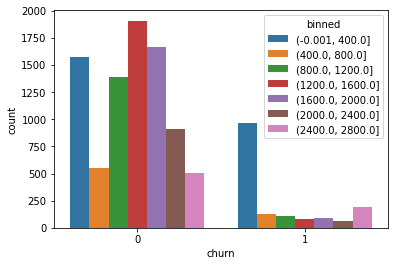

In [51]:
sns.countplot('churn',hue='binned',data=df)
plt.show()

### CONCLUSION 2: looks like low unpaid (< 400) and high unpaid (> 2400) increases chances to leave

#### Question: any difference by Gender? - not much

[[856, 1412], [291, 363], [749, 809], [968, 1015], [833, 885], [458, 489], [273, 385], [556, 1412], [72, 363], [60, 809], [47, 1015], [52, 885], [31, 489], [112, 385]]
[[721, 1131], [259, 311], [638, 691], [939, 974], [835, 871], [448, 484], [232, 307], [410, 1131], [52, 311], [53, 691], [35, 974], [36, 871], [36, 484], [75, 307]]


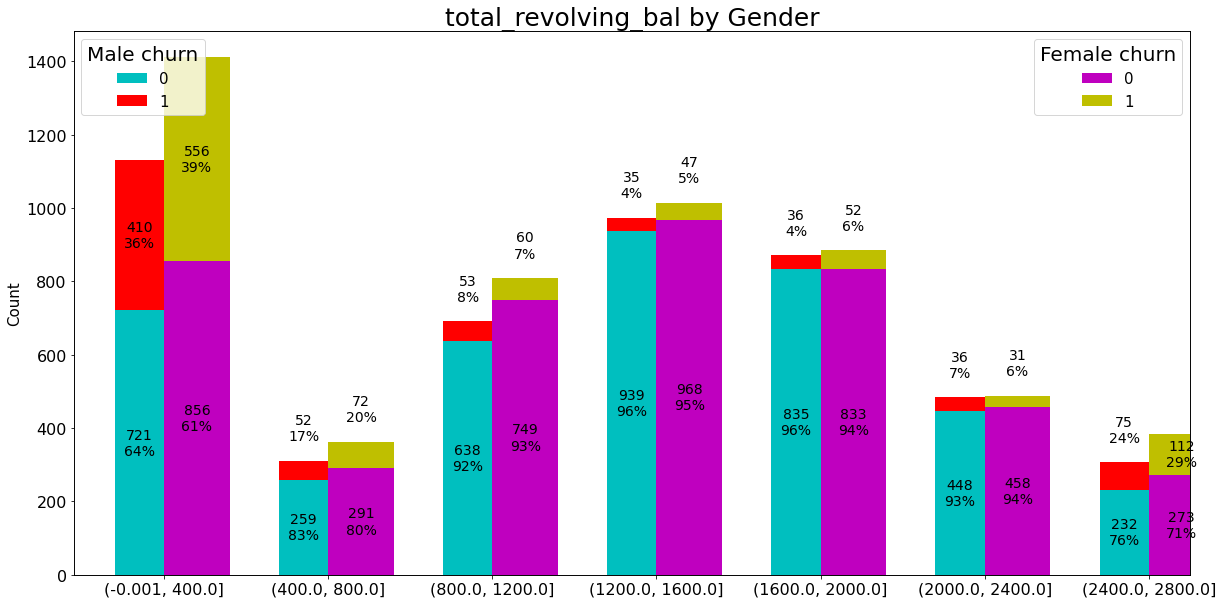

In [52]:
df_plot = df.groupby(['binned', 'female', 'churn']).size().reset_index()
df_plot = df_plot.pivot(index=['binned'], columns=['female', 'churn'], values=0)
df_plot.fillna(0, inplace=True)
df_plot_f = df_plot[(1,)]
df_plot_m = df_plot[(0,)]
barplot_2_categories(df_plot_f, df_plot_m,'total_revolving_bal by Gender')

## check total_trans_ct

### make bins from total_trans_ct then plot the countplot

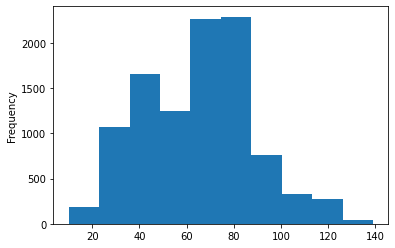

In [53]:
df['total_trans_ct'].plot(kind='hist')
plt.show()

In [54]:
bins = makebins(df['total_trans_ct'], 10)
df['binned'] = pd.cut(df['total_trans_ct'], bins, include_lowest=True)
p(df['binned'])
df.total_trans_ct.head()

client_num
768805383      (40.0, 50.0]
818770008      (30.0, 40.0]
713982108      (10.0, 20.0]
769911858      (10.0, 20.0]
709106358      (20.0, 30.0]
                  ...      
772366833    (110.0, 120.0]
710638233      (60.0, 70.0]
716506083      (50.0, 60.0]
717406983      (60.0, 70.0]
714337233      (60.0, 70.0]
Name: binned, Length: 10127, dtype: category
Categories (14, interval[float64]): [(-0.001, 10.0] < (10.0, 20.0] < (20.0, 30.0] < (30.0, 40.0] < ... <
                                     (100.0, 110.0] < (110.0, 120.0] < (120.0, 130.0] <
                                     (130.0, 140.0]]


client_num
768805383    42
818770008    33
713982108    20
769911858    20
709106358    28
Name: total_trans_ct, dtype: int64

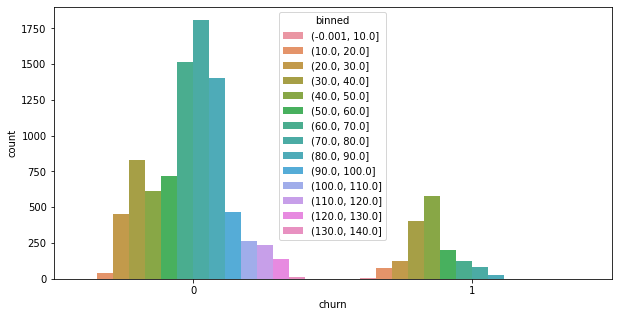

In [55]:
plt.figure(figsize=(10, 5))
sns.countplot(x='churn',hue='binned',data=df)
plt.show()

In [56]:
df.binned.loc[df.churn == 0].value_counts()

(70.0, 80.0]      1809
(60.0, 70.0]      1516
(80.0, 90.0]      1405
(30.0, 40.0]       833
(50.0, 60.0]       715
(40.0, 50.0]       614
(90.0, 100.0]      465
(20.0, 30.0]       456
(100.0, 110.0]     262
(110.0, 120.0]     239
(120.0, 130.0]     138
(10.0, 20.0]        38
(130.0, 140.0]      10
(-0.001, 10.0]       0
Name: binned, dtype: int64

### CONCLUSION 3: Anybody with total_trans_ct > 90 DID NOT leave

## check total_ct_chng_q4_q1 whose correlation with churn is 0.290054
This column "represents how much the customer increased their number of transactions when comparing the 4th quarter agains the 1st."


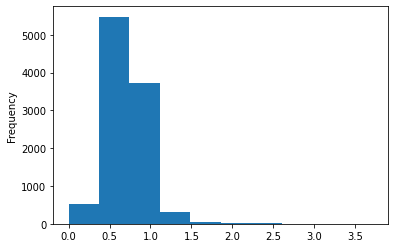

In [57]:
df['total_ct_chng_q4_q1'].plot(kind='hist')        

In [58]:
bins = makebins(df['total_ct_chng_q4_q1'], 0.4)
df['binned'] = pd.cut(df['total_ct_chng_q4_q1'], bins, include_lowest=True)
p(df['binned'].head(), '\n')
df.total_ct_chng_q4_q1.head()

client_num
768805383    (1.6, 2.0]
818770008    (3.6, 4.0]
713982108    (2.0, 2.4]
769911858    (2.0, 2.4]
709106358    (2.4, 2.8]
Name: binned, dtype: category
Categories (10, interval[float64]): [(-0.001, 0.4] < (0.4, 0.8] < (0.8, 1.2] < (1.2, 1.6] < ... <
                                     (2.4, 2.8] < (2.8, 3.2] < (3.2, 3.6] < (3.6, 4.0]] 



client_num
768805383    1.625
818770008    3.714
713982108    2.333
769911858    2.333
709106358    2.500
Name: total_ct_chng_q4_q1, dtype: float64

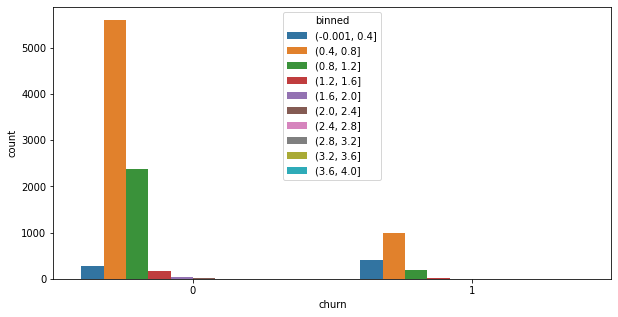

In [59]:
plt.figure(figsize=(10, 5))
sns.countplot(x='churn',hue='binned',data=df)
plt.show()    # no printout of  comments by matplotlib

In [60]:
df.binned.loc[df.churn == 1].value_counts()

(0.4, 0.8]       1002
(-0.001, 0.4]     415
(0.8, 1.2]        198
(1.2, 1.6]          9
(2.4, 2.8]          1
(2.0, 2.4]          1
(1.6, 2.0]          1
(3.6, 4.0]          0
(3.2, 3.6]          0
(2.8, 3.2]          0
Name: binned, dtype: int64

### CONCLUSION 4: Anybody with total_ct_chng_q4_q1 > 1.6 DID NOT leave

## check total_amt_chng_q4_q1 whose correlation with churn is ??
This column "represents how much the customer increased their amount of transactions when comparing the 4th quarter agains the 1st."


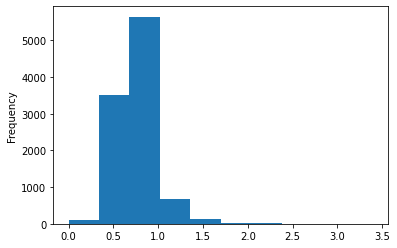

In [61]:
df['total_amt_chng_q4_q1'].plot(kind='hist')        

In [62]:
bins = makebins(df['total_amt_chng_q4_q1'], 0.4)
df['binned'] = pd.cut(df['total_amt_chng_q4_q1'], bins, include_lowest=True)
p(df['binned'].head(), '\n')
df.total_amt_chng_q4_q1.head()

client_num
768805383    (1.2, 1.6]
818770008    (1.2, 1.6]
713982108    (2.4, 2.8]
769911858    (1.2, 1.6]
709106358    (2.0, 2.4]
Name: binned, dtype: category
Categories (9, interval[float64]): [(-0.001, 0.4] < (0.4, 0.8] < (0.8, 1.2] < (1.2, 1.6] < ... <
                                    (2.0, 2.4] < (2.4, 2.8] < (2.8, 3.2] < (3.2, 3.6]] 



client_num
768805383    1.335
818770008    1.541
713982108    2.594
769911858    1.405
709106358    2.175
Name: total_amt_chng_q4_q1, dtype: float64

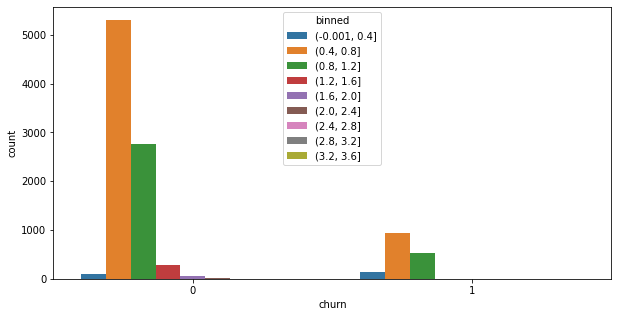

In [63]:
plt.figure(figsize=(10, 5))
sns.countplot(x='churn',hue='binned',data=df)
plt.show()    # no printout of  comments by matplotlib

In [64]:
df.binned.loc[df.churn == 1].value_counts()

(0.4, 0.8]       944
(0.8, 1.2]       534
(-0.001, 0.4]    143
(1.2, 1.6]         6
(3.2, 3.6]         0
(2.8, 3.2]         0
(2.4, 2.8]         0
(2.0, 2.4]         0
(1.6, 2.0]         0
Name: binned, dtype: int64

In [65]:
df.binned.loc[df.churn == 0].value_counts()

(0.4, 0.8]       5308
(0.8, 1.2]       2758
(1.2, 1.6]        274
(-0.001, 0.4]      90
(1.6, 2.0]         50
(2.0, 2.4]         16
(3.2, 3.6]          2
(2.4, 2.8]          2
(2.8, 3.2]          0
Name: binned, dtype: int64

### CONCLUSION 5: Anybody with total_amt_chng_q4_q1 > 1.6 DID NOT leave = exactly as for total_ct_chng_q4_q1

In [66]:
df.describe()

,churn,age,female,dependent_count,education,marital_status,income_category,card,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,0.160660,46.325960,0.529081,2.346203,2.601955,1.536585,2.072578,1.083638,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,0.367235,8.016814,0.499178,1.298908,1.700417,0.737808,1.461929,0.333784,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,0.000000,41.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,0.000000,46.000000,1.000000,2.000000,3.000000,2.000000,2.000000,1.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,0.000000,52.000000,1.000000,3.000000,4.000000,2.000000,3.000000,1.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,1.000000,73.000000,1.000000,5.000000,6.000000,3.000000,5.000000,4.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


# Age distribution

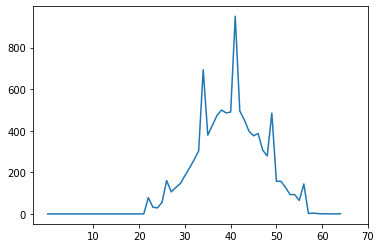

In [67]:
bins = makebins(df['age'], 1.14, 0.5)
df['binned'] = pd.cut(df['age'], bins, include_lowest=True)
#p(df['binned'])
#p(df.binned.value_counts())
s = df.binned.value_counts(sort=False)
#p(type(s))
#s[s > 0]
l = [10, 20, 30, 40, 50, 60, 70]
ax = s.plot(xticks = l)
  # change the x ticks from the defualt one that is not readable
ax.set_xticklabels(l)
  # the next line is needed to suppress matplotlib returned values that is printed
plt.show()

# Gender effect

,total_trans_ct,total_revolving_bal,total_ct_chng_q4_q1,contacts_count_12_mon,churn
churn,-0.371403,-0.263053,-0.290054,0.204491,0.0
contacts_count_12_mon,-0.152213,-0.053913,-0.094997,0.000000,0.0
total_ct_chng_q4_q1,0.112324,0.089861,0.000000,0.000000,0.0
total_revolving_bal,0.056060,0.000000,0.000000,0.000000,0.0
total_trans_ct,0.000000,0.000000,0.000000,0.000000,0.0


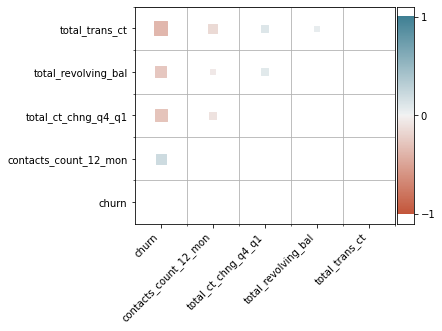

In [68]:
df_corr_0_2 = df[['churn', 'contacts_count_12_mon', 'total_revolving_bal', 'total_trans_ct', 'total_ct_chng_q4_q1']]
display_corr(df_corr_0_2, clear='lowerRightDiagonal')

,total_trans_ct,total_revolving_bal,total_ct_chng_q4_q1,contacts_count_12_mon,churn
churn,0.077461,0.024639,0.128598,0.365093,0.0
contacts_count_12_mon,0.712082,0.551140,0.734371,0.000000,0.0
total_ct_chng_q4_q1,0.851508,0.662105,0.000000,0.000000,0.0
total_revolving_bal,0.649750,0.000000,0.000000,0.000000,0.0
total_trans_ct,0.000000,0.000000,0.000000,0.000000,0.0


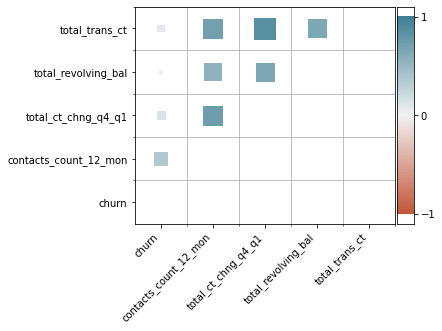

In [69]:
result = df_corr_0_2.mul(df.female, axis=0)
display_corr(result, clear='lowerRightDiagonal')

# What are average values of numerical features for card holders that left?

In [70]:
p(df[df.churn == 1].mean(), '\n', df[df.churn == 0].mean())

churn                          1.000000
age                           46.659496
female                         0.571604
dependent_count                2.402581
education                      2.636140
marital_status                 1.505224
income_category                2.007376
card                           1.085433
months_on_book                36.178242
total_relationship_count       3.279656
months_inactive_12_mon         2.693301
contacts_count_12_mon          2.972342
credit_limit                8136.039459
total_revolving_bal          672.822987
avg_open_to_buy             7463.216472
total_amt_chng_q4_q1           0.694277
total_trans_amt             3095.025814
total_trans_ct                44.933620
total_ct_chng_q4_q1            0.554386
avg_utilization_ratio          0.162475
dtype: float64 
 churn                          0.000000
age                           46.262118
female                         0.520941
dependent_count                2.335412
education              

# Grouping by Card holders that left

In [71]:
columns_to_show = ['contacts_count_12_mon', 'total_revolving_bal', 'total_trans_ct', 'total_ct_chng_q4_q1']
df.groupby(['churn'])[columns_to_show].describe()

contacts_count_12_mon                      ... total_ct_chng_q4_q1              
                      count      mean       std  ...                 50%    75%    max
churn                                            ...                                  
0                    8500.0  2.356353  1.081436  ...               0.721  0.833  3.714
1                    1627.0  2.972342  1.090537  ...               0.531  0.692  2.500

[2 rows x 32 columns]

In [72]:
df.groupby(['churn', 'female'])[columns_to_show].agg([np.mean, np.std, np.min, np.max])

contacts_count_12_mon                 ... total_ct_chng_q4_q1              
                              mean       std amin  ...                 std   amin   amax
churn female                                       ...                                  
0     0                   2.413310  1.098379    0  ...            0.246301  0.143  3.571
      1                   2.303975  1.063051    0  ...            0.209557  0.028  3.714
1     0                   3.021521  1.076577    0  ...            0.252603  0.000  2.500
      1                   2.935484  1.100019    0  ...            0.203639  0.000  1.684

[4 rows x 16 columns]

# Effects of some columns on churn card holders (those that left)

source: https://www.kaggle.com/kashnitsky/topic-1-exploratory-data-analysis-with-pandas

## RECALL is more important if there is no importance to the accuracy (precision)
For example: Precision is very important for cancer dignosys, but Recall is more import when calling customers to buy or to stay on boad. It depends on what the costs of each error.

In [73]:
pd.crosstab(df.churn, df.contacts_count_12_mon, margins=True)

contacts_count_12_mon,0,1,2,3,4,5,6,All
churn,,,,,,,,
0,392,1391,2824,2699,1077,117,0,8500
1,7,108,403,681,315,59,54,1627
All,399,1499,3227,3380,1392,176,54,10127


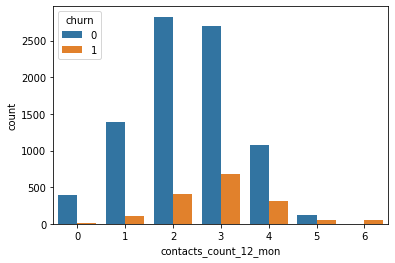

In [74]:
sns.countplot(x='contacts_count_12_mon', hue='churn', data=df)

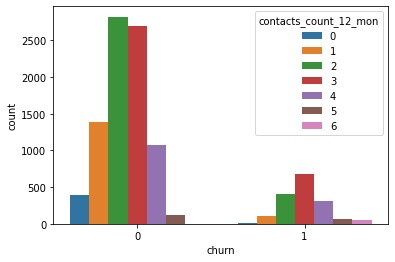

In [75]:
sns.countplot(x='churn',hue='contacts_count_12_mon',data=df)

# FUNCTION calc_confusion()

In [76]:
def calc_confusion(df, show=True, row=None, new_df=None, print_results=True):
  if show:
    d(df)
    print()
  T_col = 0 if df.columns[0] == 1 else 1
  F_col = 1 - T_col
  TP = df.iloc[T_col, T_col]
  TN = df.iloc[F_col, F_col]
  FP = df.iloc[F_col, T_col]
  FN = df.iloc[T_col, F_col]
  recall = np.round(100 * (TP / (TP + FN)), 2)
  precision = np.round(100 * (TP / (TP + FP)), 2)
  accuracy = np.round(100 * (TP + FN) / (TP + FN + TN + FP), 2)
  F_measure = np.round((2 * recall * precision) / (recall + precision), 2)
  if row is not None:
    if print_results:
      print(row)
    if new_df is not None:
      new_df.loc[row]= [recall, precision, accuracy, F_measure] 
  if print_results:   
    print(f"Recall = \t{recall}%")
    print(f"Precision = \t{precision}%")
    print(f"Accuracy = \t{accuracy}%")
    print(f"F-measure = \t{F_measure}%")

## Many_calls = df.contacts_count_12_mon > 4

In [77]:
df['Many_service_calls'] = (df.contacts_count_12_mon > 4).astype('int')

df_m = pd.crosstab(df['Many_service_calls'], df.churn, margins=True)#, normalize='columns')
calc_confusion(df_m)

churn,0,1,All
Many_service_calls,,,
0,8383,1514,9897
1,117,113,230
All,8500,1627,10127



Recall = 	49.13%
Precision = 	6.95%
Accuracy = 	2.27%
F-measure = 	12.18%


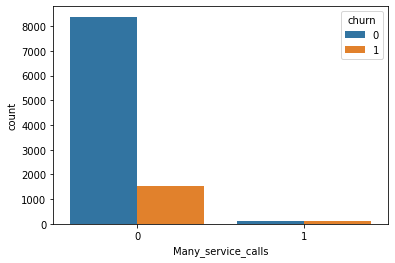

In [78]:
sns.countplot(x='Many_service_calls', hue='churn', data=df)

In [79]:
#p(df.card.value_counts())
df_f = pd.crosstab(df['Many_service_calls'] & df.female , df.churn, margins=True)
calc_confusion(df_f)

churn,0,1,All
row_0,,,
0,8466,1565,10031
1,34,62,96
All,8500,1627,10127



Recall = 	64.58%
Precision = 	3.81%
Accuracy = 	0.95%
F-measure = 	7.2%


# Combine our 4 conclusion above for increase chances to leave:
1. More than 4 calls
2. revolving balance < 250 or > 2500 (total_revolving_bal)
3. total_trans_ct < 100
4. total_ct_chng_q4_q1 < 1.6

In [80]:
df['predict_churn'] = ((df.contacts_count_12_mon > 4) & 
                       ((df.total_revolving_bal < 250) | (df.total_revolving_bal > 2500)) &
                        (df.total_trans_ct < 100) &
                        (df.total_ct_chng_q4_q1 < 1.6)
                        ).astype('int')                       

In [81]:
df_p = pd.crosstab(df['predict_churn'], df.churn, margins=True)
calc_confusion(df_p)

churn,0,1,All
predict_churn,,,
0,8475,1549,10024
1,25,78,103
All,8500,1627,10127



Recall = 	75.73%
Precision = 	4.79%
Accuracy = 	1.02%
F-measure = 	9.01%


In [82]:
df_pf = pd.crosstab(df['predict_churn'] & df.female, df.churn, margins=True)
calc_confusion(df_pf)

churn,0,1,All
row_0,,,
0,8492,1583,10075
1,8,44,52
All,8500,1627,10127



Recall = 	84.62%
Precision = 	2.7%
Accuracy = 	0.51%
F-measure = 	5.23%


# Try all combinations of the 4 columns and gender

In [83]:
masks = ['df.contacts_count_12_mon > 4', 
        '(df.total_revolving_bal < 250) | (df.total_revolving_bal > 2500)',
        'df.total_trans_ct < 100',
        'df.total_ct_chng_q4_q1 < 1.6',
        'df.female == 1']
new_df = pd.DataFrame(df.churn)

In [84]:
df_confusion = pd.DataFrame(columns=('Recall', 'Precision', 'Accuracy', 'F-measure')) 
for i in range(len(masks)):
  df.loc[pd.eval(masks[i]), 'temp'] = 'True'
  df.loc[~pd.eval(masks[i]), 'temp'] = 'False'
  df_pf = pd.crosstab(df['temp'], df.churn, margins=True)
  calc_confusion(df_pf, show=False, row=masks[i], new_df=df_confusion)
  p()
  new_df['mask' + str(i)] = df.predict_churn
df.drop('temp', axis=1, inplace=True)  

df.contacts_count_12_mon > 4
Recall = 	49.13%
Precision = 	6.95%
Accuracy = 	2.27%
F-measure = 	12.18%

(df.total_revolving_bal < 250) | (df.total_revolving_bal > 2500)
Recall = 	35.84%
Precision = 	66.75%
Accuracy = 	29.92%
F-measure = 	46.64%

df.total_trans_ct < 100
Recall = 	17.24%
Precision = 	100.0%
Accuracy = 	93.22%
F-measure = 	29.41%

df.total_ct_chng_q4_q1 < 1.6
Recall = 	16.15%
Precision = 	99.82%
Accuracy = 	99.31%
F-measure = 	27.8%

df.female == 1
Recall = 	17.36%
Precision = 	57.16%
Accuracy = 	52.91%
F-measure = 	26.63%



In [85]:
d(new_df.head())
df_confusion

,churn,mask0,mask1,mask2,mask3,mask4
client_num,,,,,,
768805383,0,0,0,0,0,0
818770008,0,0,0,0,0,0
713982108,0,0,0,0,0,0
769911858,0,0,0,0,0,0
709106358,0,0,0,0,0,0


,Recall,Precision,Accuracy,F-measure
df.contacts_count_12_mon > 4,49.13,6.95,2.27,12.18
(df.total_revolving_bal < 250) | (df.total_revolving_bal > 2500),35.84,66.75,29.92,46.64
df.total_trans_ct < 100,17.24,100.00,93.22,29.41
df.total_ct_chng_q4_q1 < 1.6,16.15,99.82,99.31,27.80
df.female == 1,17.36,57.16,52.91,26.63


## check all 31 combinations of these 5 conditions

In [86]:
from itertools import product
mask = list(masks.copy())
mask = [0,1,2,3,4]
values = {
    'a': mask,
    'b': mask,
    'c': mask,
    'd': mask,
    'e': mask
}
case = ['a', 'b', 'c', 'd', 'e']
coms = product(*[values[c] for c in case])
new_coms = []
for c in coms:
  s = list(set(c))
  if s not in new_coms:
    new_coms.append(s)
s = [] 
#masks[s[0]]
for sub_s in sorted(new_coms):
  s0 = ''
  for i in sub_s:
    s0 += f'({masks[i]}) & ' 
  s.append(s0[:-3])
len(s)
s[1] 

'(df.contacts_count_12_mon > 4) & ((df.total_revolving_bal < 250) | (df.total_revolving_bal > 2500))'

In [87]:
df_confusion = pd.DataFrame(columns=('Recall', 'Precision', 'Accuracy', 'F-measure')) 
for i in range(len(s)):
  df.loc[pd.eval(s[i]), 'temp'] = 'True'
  df.loc[~pd.eval(s[i]), 'temp'] = 'False'
  df_pf = pd.crosstab(df['temp'], df.churn, margins=True)
  calc_confusion(df_pf, show=False, row=s[i], new_df=df_confusion, print_results=False)
  new_df['mask' + str(i)] = df.predict_churn
df.drop('temp', axis=1, inplace=True)  

In [88]:
#d(new_df.head())
#p(df_confusion.shape)
df_confusion.sort_values('Recall', axis=0, ascending=False, inplace=True)
df_confusion['row'] = range(1, len(df_confusion.index) + 1)
df_confusion

,Recall,Precision,Accuracy,F-measure,row
(df.contacts_count_12_mon > 4) & ((df.total_revolving_bal < 250) | (df.total_revolving_bal > 2500)) & (df.total_trans_ct < 100) & (df.total_ct_chng_q4_q1 < 1.6) & (df.female == 1),84.62,2.70,0.51,5.23,1
(df.contacts_count_12_mon > 4) & ((df.total_revolving_bal < 250) | (df.total_revolving_bal > 2500)) & (df.total_trans_ct < 100) & (df.female == 1),84.62,2.70,0.51,5.23,2
(df.contacts_count_12_mon > 4) & ((df.total_revolving_bal < 250) | (df.total_revolving_bal > 2500)) & (df.total_ct_chng_q4_q1 < 1.6) & (df.female == 1),84.62,2.70,0.51,5.23,3
(df.contacts_count_12_mon > 4) & ((df.total_revolving_bal < 250) | (df.total_revolving_bal > 2500)) & (df.female == 1),84.62,2.70,0.51,5.23,4
(df.contacts_count_12_mon > 4) & ((df.total_revolving_bal < 250) | (df.total_revolving_bal > 2500)) & (df.total_trans_ct < 100),75.96,4.86,1.03,9.14,5
(df.contacts_count_12_mon > 4) & ((df.total_revolving_bal < 250) | (df.total_revolving_bal > 2500)) & (df.total_trans_ct < 100) & (df.total_ct_chng_q4_q1 < 1.6),75.73,4.79,1.02,9.01,6
(df.contacts_count_12_mon > 4) & ((df.total_revolving_bal < 250) | (df.total_revolving_bal > 2500)),74.53,4.86,1.05,9.12,7
(df.contacts_count_12_mon > 4) & ((df.total_revolving_bal < 250) | (df.total_revolving_bal > 2500)) & (df.total_ct_chng_q4_q1 < 1.6),74.29,4.79,1.04,9.00,8
(df.contacts_count_12_mon > 4) & (df.total_trans_ct < 100) & (df.total_ct_chng_q4_q1 < 1.6) & (df.female == 1),66.67,3.81,0.92,7.21,9
(df.contacts_count_12_mon > 4) & (df.total_trans_ct < 100) & (df.female == 1),66.67,3.81,0.92,7.21,10


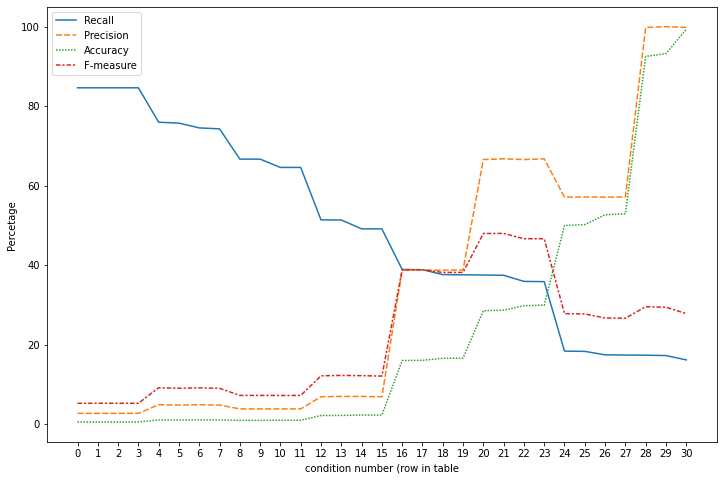

In [89]:
plt.figure(figsize=(12, 8))
ax = sns.lineplot(data=df_confusion[df_confusion.columns[:-1]])
l = range(31)
  # change the x ticks from the defualt one that is not readable
ax.set_xticklabels(l)
plt.xlabel('condition number (row in table')
plt.ylabel('Percetage')
plt.show()    # no printout of  comments by matplotlib

#Inquiries:

## 1. Credit card type versus Income

In [90]:
d(df.groupby(['card','income_category'])['churn'].count())
df['card'].value_counts()

card  income_category
1     0                  1045
      1                  3403
      2                  1675
      3                  1395
      4                  1273
      5                   645
2     0                    53
      1                   130
      2                    99
      3                   117
      4                    96
      5                    60
3     0                     9
      1                    24
      2                    15
      3                    21
      4                    29
      5                    18
4     0                     5
      1                     4
      2                     1
      3                     2
      4                     4
      5                     4
Name: churn, dtype: int64

1    9436
2     555
3     116
4      20
Name: card, dtype: int64

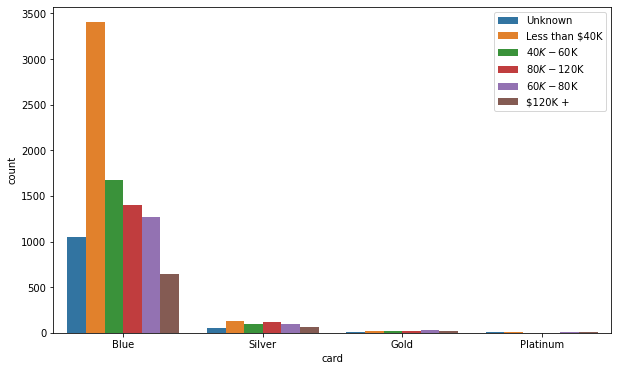

In [91]:
fig = plt.figure(figsize=(10, 6))
#sns.countplot(x='income_category', hue='card', data=df)
ax = sns.countplot(hue='income_category', x='card', data=df)
ax.set_xticklabels(cards[1:])
plt.legend(incs)
plt.show()

## 2. Credit card type versus age

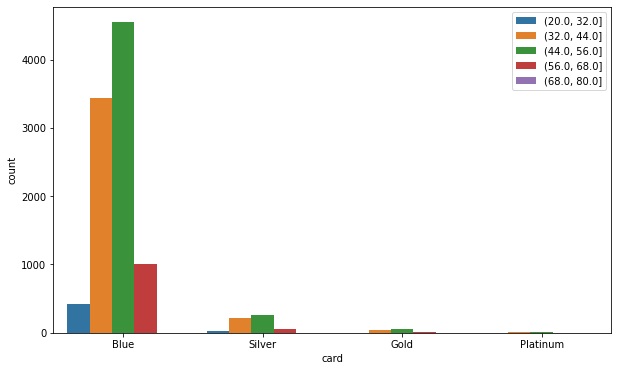

In [92]:
bins = makebins(df['age'], interval=16, start=20)
df['age_binned'] = pd.cut(df['age'], bins, include_lowest=False)
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(hue='age_binned', x='card', data=df)
ax.set_xticklabels(cards[1:])
plt.legend(loc='upper right')
plt.show()

# FUNCTION: female_by_100()

In [ ]:
def female_by_100(col1, col2, title):
  df_plot = df.groupby([col1, col2]).size().reset_index()
  df_plot = df_plot.pivot(index=[col1], columns=[col2], values=0)
  df_plot.fillna(0, inplace=True)
  df_plot_f = df_plot[(1)] * 100 / num_f
  df_plot_m = df_plot[(0)] * 100 / num_m
  barplot_2_categories(df_plot_f, df_plot_m,title, show_labels=True, ylabel='Count per 100', percent=True, fraction=True,stacked=False, title1="Female", title2="Male")

## 3. Credit card type versus gender and by gender_per_100

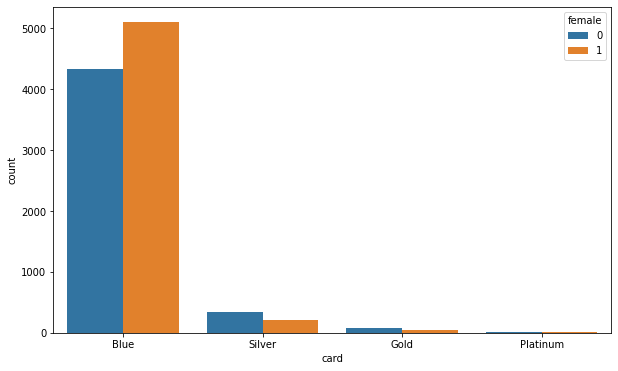

In [93]:
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(hue='female', x='card', data=df)
ax.set_xticklabels(cards[1:])
plt.show()

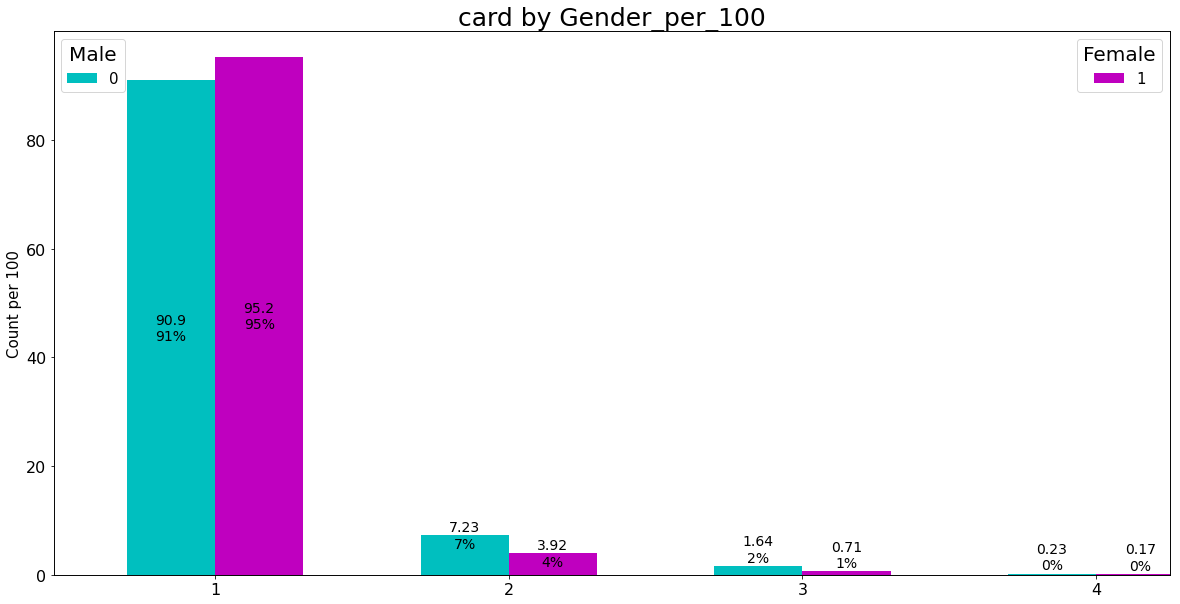

In [158]:
female_by_100('card', 'female', 'card by Gender_per_100')

## 3A. Income category type versus gender and by gender_per_100

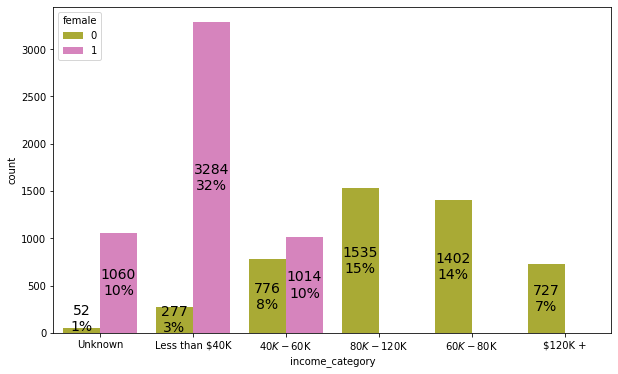

In [140]:
fig = plt.figure(figsize=(10, 6))
ax = sns.countplot(hue='female', x='income_category', data=df, palette=["C8", "C6"])
add_labels(ax, percent=True)
ax.set_xticklabels(incs)
plt.show()

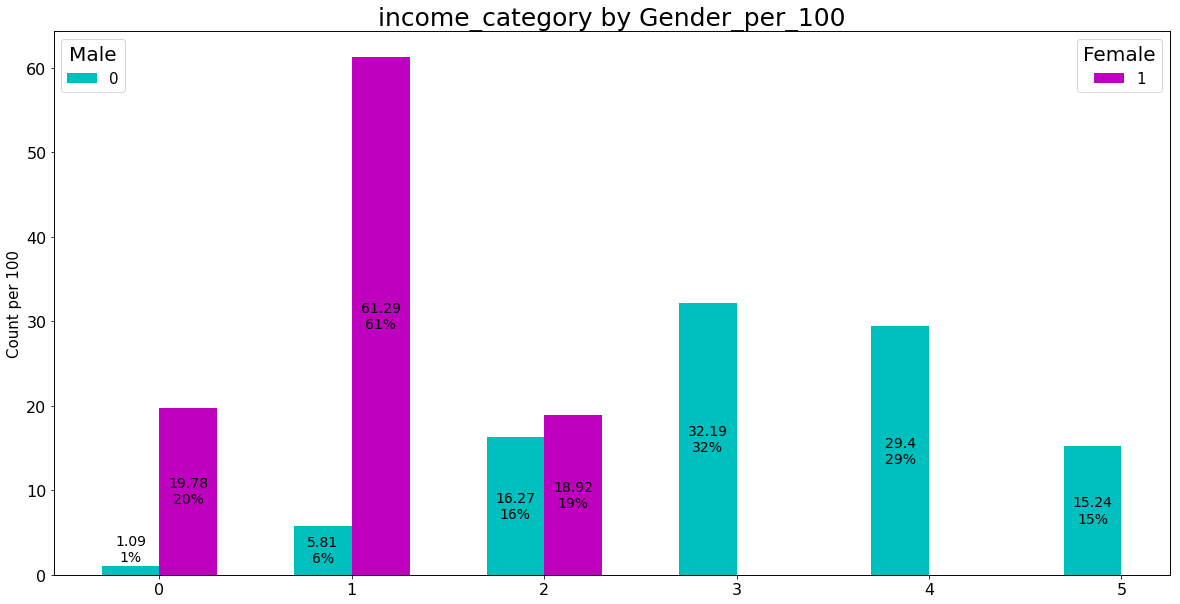

In [157]:
female_by_100('income_category', 'female', 'income_category by Gender_per_100')

# FUNCTION: sns_bar()

In [96]:
def sns_bar(df, x, hue=None, bins=12, multiple='dodge', hue_order=None, hue_labels=None, show_labels=True, title=None, 
            legend_title=None, percent=True, height=None, aspect=None, palette=None, displot=True):

  legend = True if hue_labels is None and legend_title is None else False

  if displot:
    if bins == 12:
      height=10 if height is None else height
      aspect=2  if aspect is None else aspect
    else:  # bins = 6
      height=6 if height is None else height
      aspect=1.5 if aspect is None else aspect
    plot = sns.displot(df, x=x, hue=hue, bins=bins, multiple=multiple, hue_order=hue_order, legend=legend, height=height, aspect=aspect, palette=palette)
    ax=plot.ax
  else:
    fig = plt.figure(figsize=(bins*2, bins+2))
    stat='count'
    ax = sns.histplot(df, x=x, hue=hue, bins=bins, multiple=multiple, hue_order=hue_order, legend=legend)#, palette=palette)
    if stat != 'count':
      percent=False

  if show_labels:
    add_labels(ax, multiple=='stack', bins, percent)
      
  if title:
    plt.title(title, fontsize=25)
  plt.xlabel('')
  plt.ylabel('Count', fontsize = 15)
  if not legend_title is None:
    if hue_labels is None:
      hue_labels = df[hue].value_counts(sort=False).index
    plt.legend(title=legend_title, labels=hue_labels[::-1], loc='upper right', fontsize=15, title_fontsize=20)

  plt.show()
  return ax

## 4. Spending versus gender and by gender_per_100: females spend less 


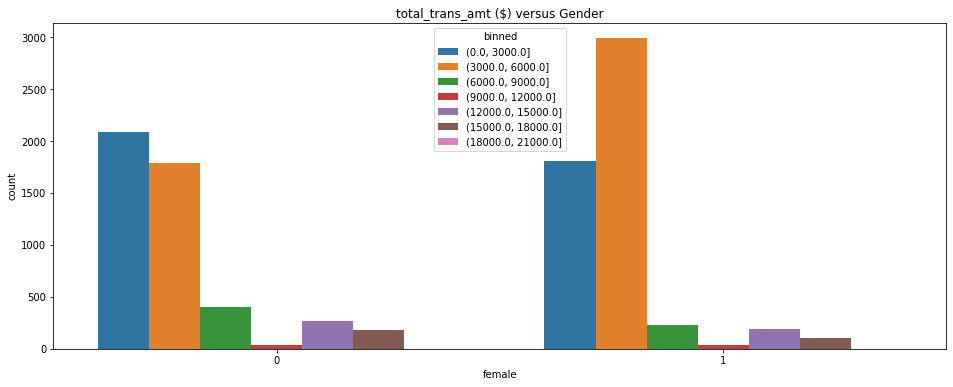

In [150]:
bins = makebins(df['total_trans_amt'], interval=3000, start=0)
df['binned'] = pd.cut(df['total_trans_amt'], bins)
fig = plt.figure(figsize=(16, 6))
ax = sns.countplot(hue='binned', x='female', data=df)
plt.title('total_trans_amt ($) versus Gender')
plt.show()

In [99]:
df[['binned','female']].value_counts(sort=False)

binned              female
(0.0, 3000.0]       0         2088
                    1         1809
(3000.0, 6000.0]    0         1791
                    1         2989
(6000.0, 9000.0]    0          398
                    1          233
(9000.0, 12000.0]   0           41
                    1           32
(12000.0, 15000.0]  0          269
                    1          192
(15000.0, 18000.0]  0          181
                    1          103
(18000.0, 21000.0]  0            1
dtype: int64

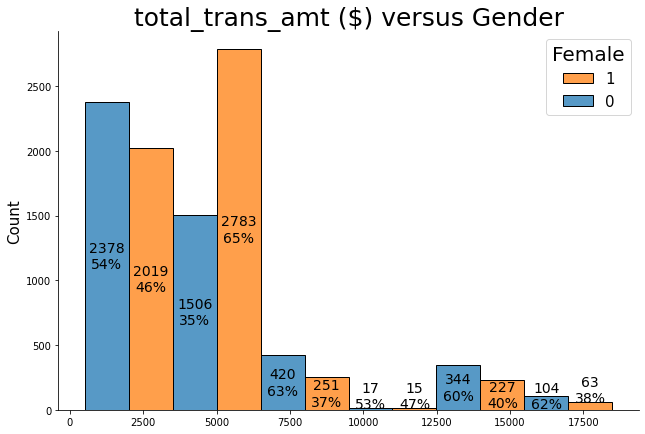

In [147]:
sns_bar(df, x='total_trans_amt', hue='female', bins = 6, title='total_trans_amt ($) versus Gender', show_labels=True, legend_title='Female')
plt.show()

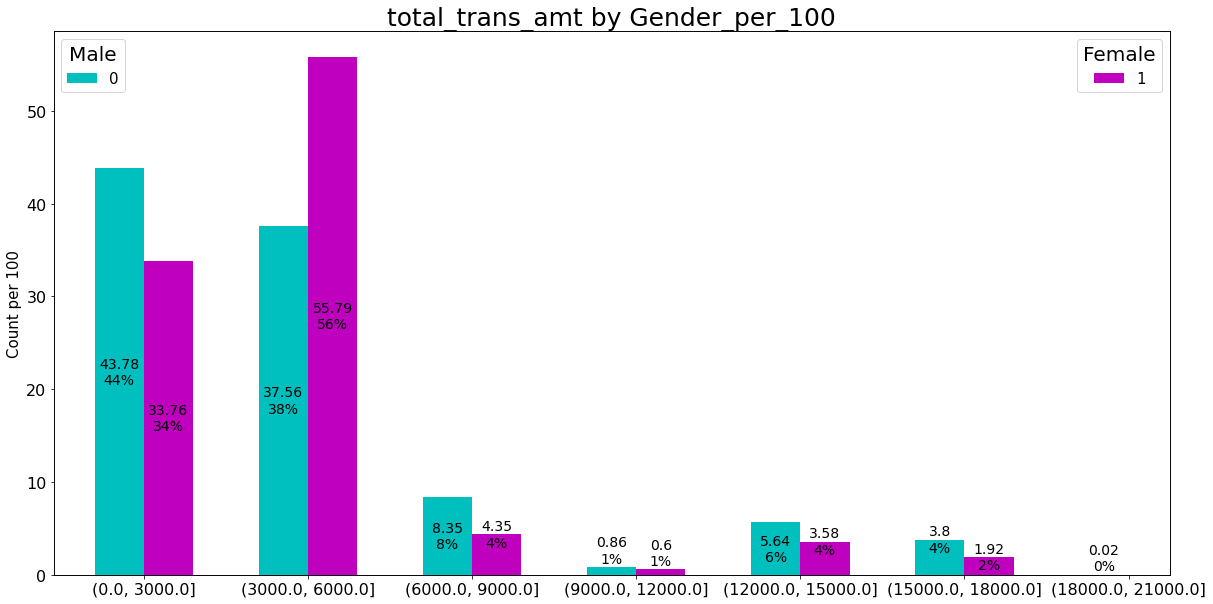

In [156]:
female_by_100('binned', 'female', 'total_trans_amt by Gender_per_100')

## 4A. Pay in full by gender and by gender_per_100 - no difference

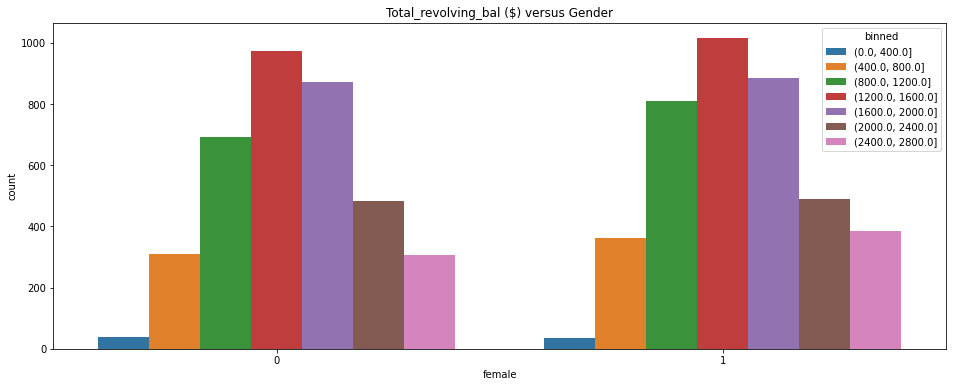

In [159]:
bins = makebins(df['total_revolving_bal'], interval=400, start=0)
df['binned'] = pd.cut(df['total_revolving_bal'], bins, include_lowest=False)
fig = plt.figure(figsize=(16, 6))
ax = sns.countplot(hue='binned', x='female', data=df)
plt.title('Total_revolving_bal ($) versus Gender')
plt.show()

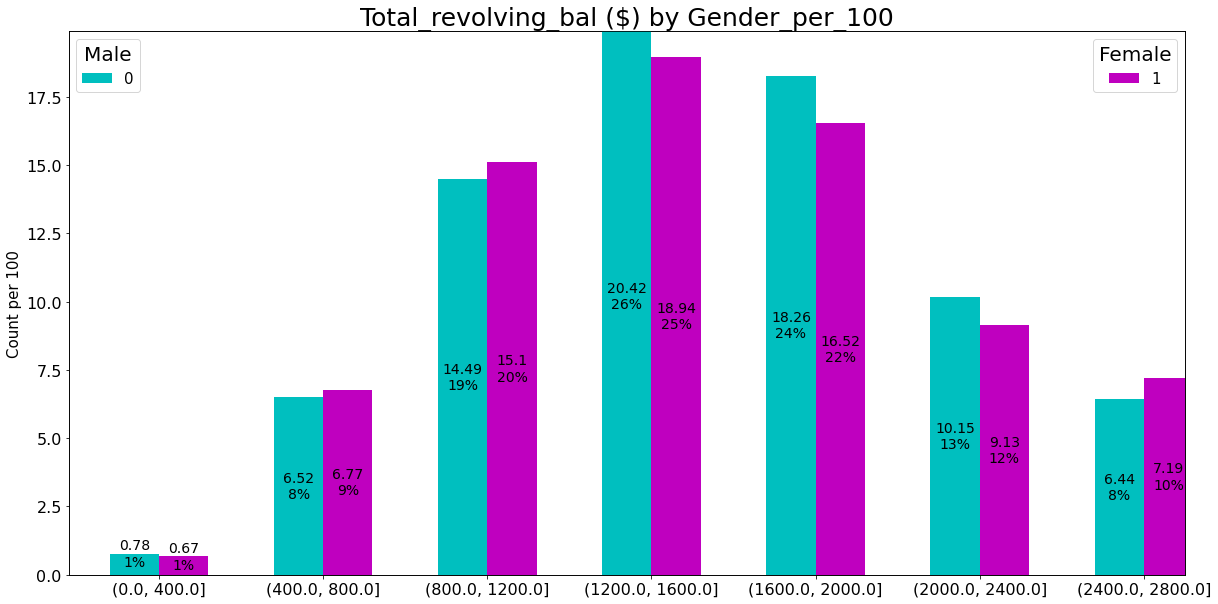

In [160]:
female_by_100('binned', 'female', 'Total_revolving_bal ($) by Gender_per_100')

## 5. Credit limit versus gender and by gender_per_100 - Credit limit for female is much lower

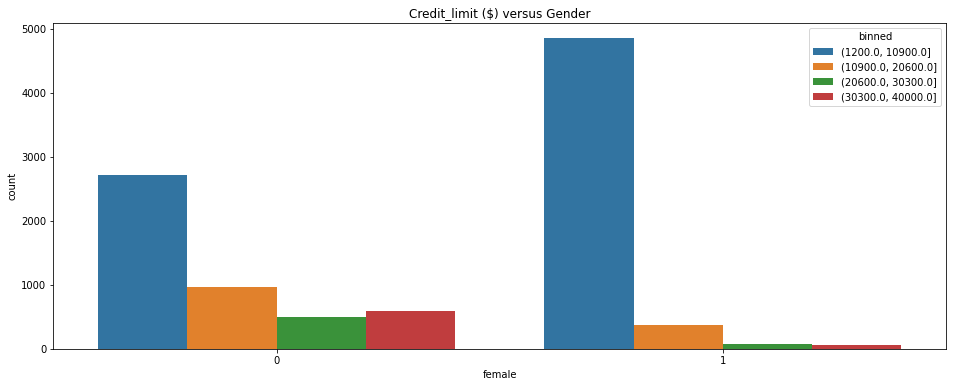

In [161]:
bins = makebins(df['credit_limit'], interval=10000, start=1200)
df['binned'] = pd.cut(df['credit_limit'], bins, include_lowest=False)
fig = plt.figure(figsize=(16, 6))
ax = sns.countplot(hue='binned', x='female', data=df)
plt.title('Credit_limit ($) versus Gender')
plt.show()

In [103]:
df[['binned','female']].value_counts(sort=False)

binned              female
(1200.0, 10900.0]   0         2712
                    1         4852
(10900.0, 20600.0]  0          969
                    1          370
(20600.0, 30300.0]  0          496
                    1           72
(30300.0, 40000.0]  0          592
                    1           64
dtype: int64

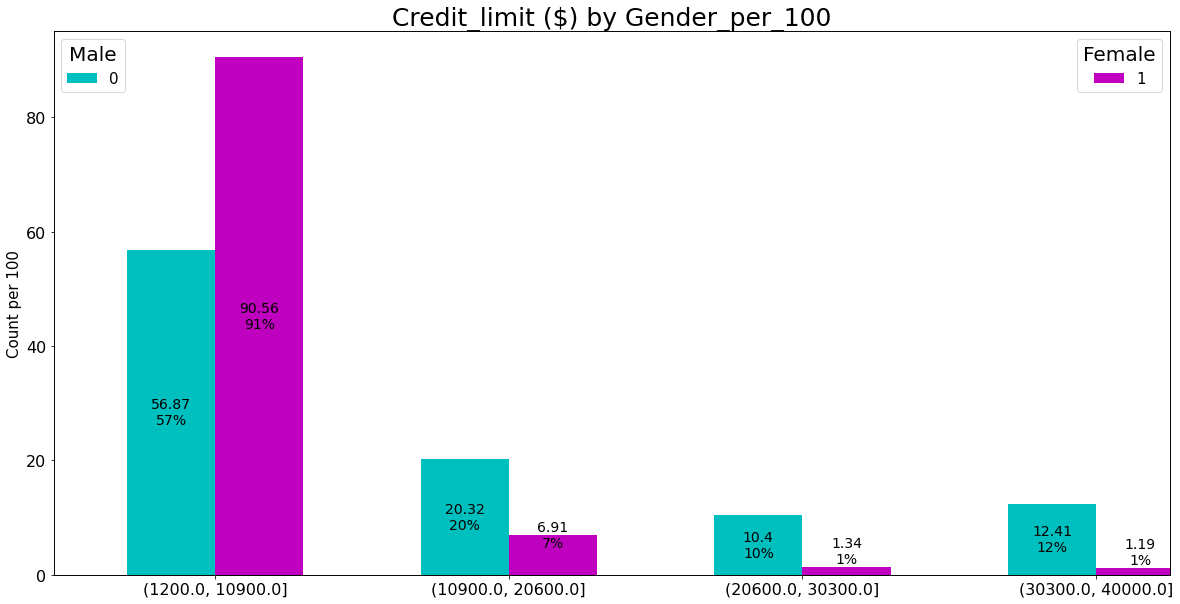

In [162]:
female_by_100('binned', 'female', 'Credit_limit ($) by Gender_per_100')

## Credit Limit versus churn

אם גובה מסגרת האשראי משפיע על ההחלטה להתנתק? 

תשובה: לא

בגרף ניתן לראות בציר איקס בינים של כ-$3,000 עבור מסגרת אשראי, בציר וואי כמות אנשים שקיבלו את המסגרת.

ניתן גם לראות לפי הגרף, את הפילוח של מסגרת אשראי. רוב האנשים מקבלים מסגרת אשראי עד 3,000. 




[[3988, 4802], [1276, 1521], [794, 947], [531, 622], [374, 452], [281, 318], [223, 250], [190, 211], [148, 177], [103, 117], [92, 107], [500, 603], [814, 4802], [245, 1521], [153, 947], [91, 622], [78, 452], [37, 318], [27, 250], [21, 211], [29, 177], [14, 117], [15, 107], [103, 603]]


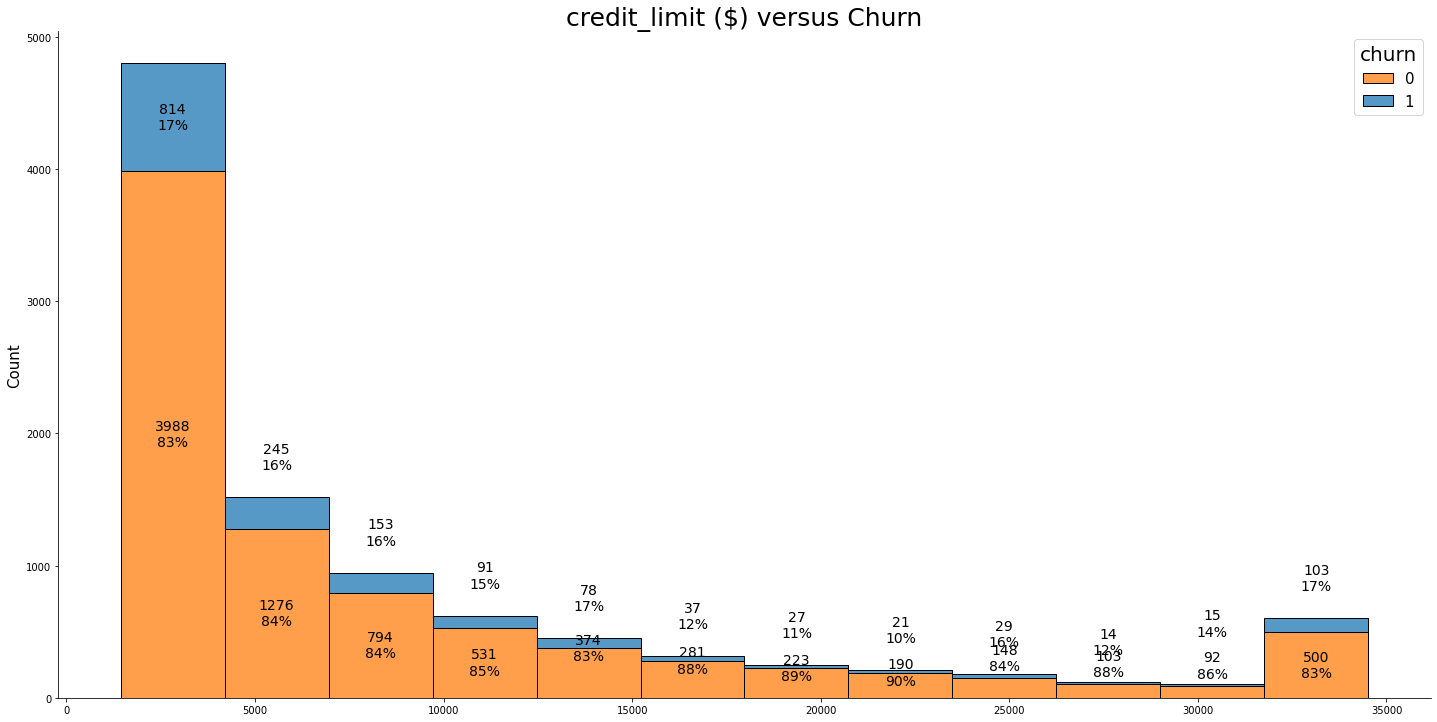

In [104]:
sns_bar(df, x='credit_limit', multiple='stack', hue='churn', hue_order=[1,0], hue_labels=[1,0], title='credit_limit ($) versus Churn', legend_title='churn')

## 6. Utilization versus gender and by gender_per_100 - Females utilize the card much better than male

Ratio between (credit card spent + money withdrawal)

and (Total available limit for credit card spends + Total money withdrawal limit)

That is because male get credit limit higher than they use

Recommendation: Increase credit limit of females

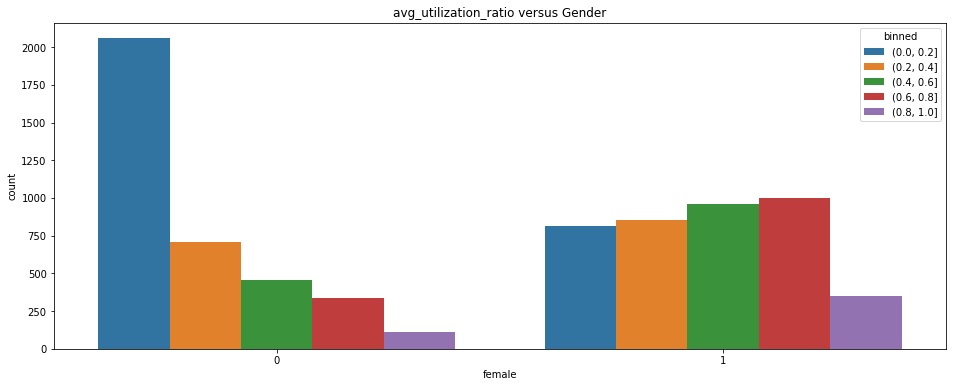

In [163]:
bins = makebins(df['avg_utilization_ratio'], interval=0.2, start=0)
df['binned'] = pd.cut(df['avg_utilization_ratio'], bins, include_lowest=False)
fig = plt.figure(figsize=(16, 6))
ax = sns.countplot(hue='binned', x='female', data=df)
plt.title('avg_utilization_ratio versus Gender')
plt.show()

In [106]:
df[['binned','female']].value_counts(sort=False)

binned      female
(0.0, 0.2]  0         2059
            1          817
(0.2, 0.4]  0          711
            1          854
(0.4, 0.6]  0          453
            1          961
(0.6, 0.8]  0          338
            1          997
(0.8, 1.0]  0          114
            1          353
dtype: int64

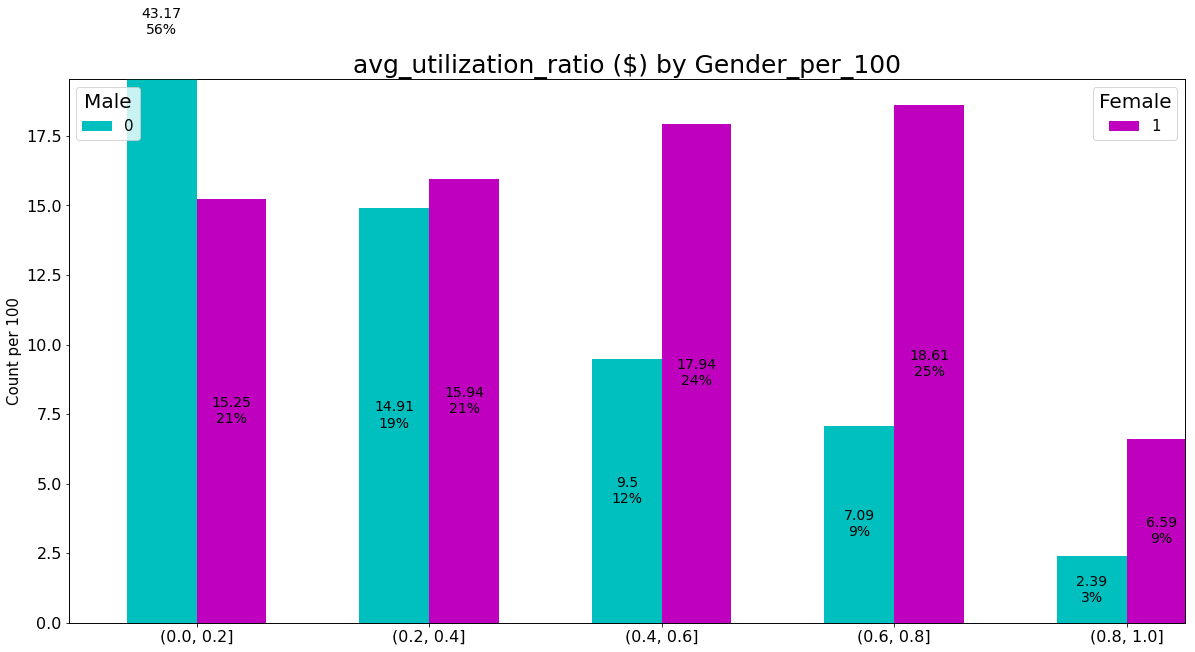

In [164]:
female_by_100('binned', 'female', 'avg_utilization_ratio ($) by Gender_per_100')

## 7. Paying on time versus age - no conclusion

In [107]:
df['binned'].value_counts(sort=False)

(0.0, 0.2]    2876
(0.2, 0.4]    1565
(0.4, 0.6]    1414
(0.6, 0.8]    1335
(0.8, 1.0]     467
Name: binned, dtype: int64

[[26, 341], [77, 1207], [133, 2326], [101, 2002], [95, 1377], [34, 396], [1, 8], [58, 341], [224, 1207], [380, 2326], [351, 2002], [238, 1377], [83, 396], [1, 8], [77, 341], [245, 1207], [400, 2326], [348, 2002], [270, 1377], [72, 396], [2, 8], [80, 341], [262, 1207], [451, 2326], [393, 2002], [283, 1377], [93, 396], [3, 8], [100, 341], [399, 1207], [962, 2326], [809, 2002], [491, 1377], [114, 396], [1, 8]]


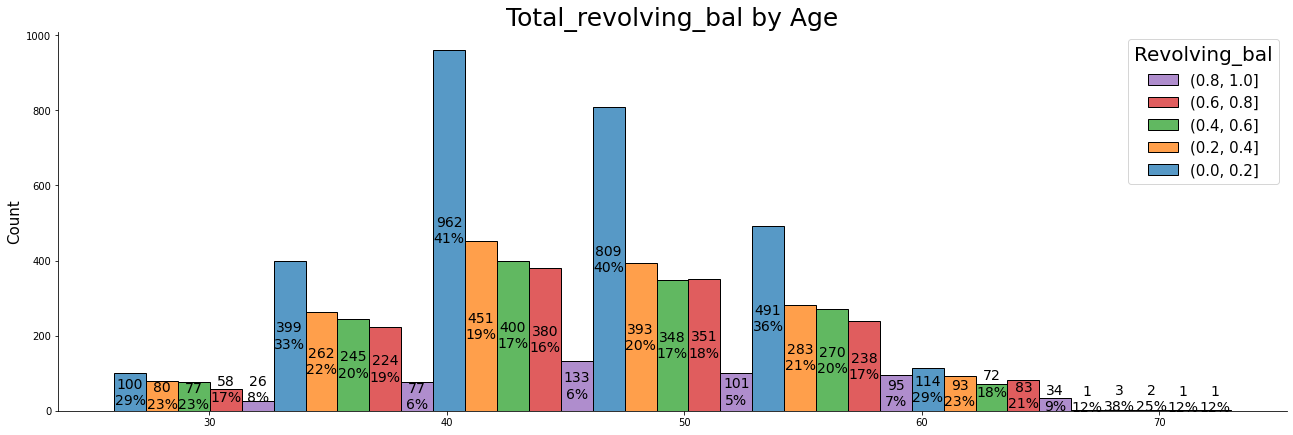

In [108]:
sns_bar(df, x='age', hue='binned', bins = 7, title='Total_revolving_bal by Age', show_labels=True, percent=True, 
        legend_title='Revolving_bal', height=6, aspect=3)# palette=sns.color_palette("hls", len(incs)), hue_labels=incs[::-1])

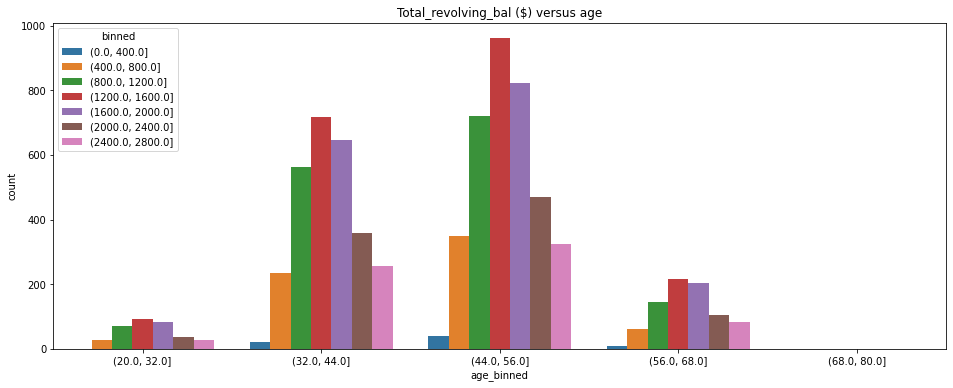

In [109]:
bins = makebins(df['total_revolving_bal'], interval=400, start=0)
df['binned'] = pd.cut(df['total_revolving_bal'], bins, include_lowest=False)
fig = plt.figure(figsize=(16, 6))
ax = sns.countplot(hue='binned', x='age_binned', data=df)
#ax.set_xticklabels(cards[1:])
#plt.legend(loc='upper right')
plt.title('Total_revolving_bal ($) versus age')
plt.show()

## 8. Income versus age

מה התפלגות של גובה הכנסות לפי הגיל?

בגרף שציירתי בציר איקס רואים בינים של גיל (10 שנים), עבור כל בין חישבתי אחוז אנשים שיש להם הכנסה מסוג מסוים וגם הצגתי את כמות הנומינלית של האנשים שיש להם אותה הכנסה.

הכי הרבה אנשים עם משכורת מתחת ל-40,000 בגילאים 40-50
אחוז הכי נמוך של ההכנסות מעל 120,000  היא בגילאים 20 עד 30 ומעל גיל 60. 


[[36, 919], [198, 3256], [378, 4342], [115, 1456], [0, 154], [111, 919], [503, 3256], [582, 4342], [206, 1456], [0, 154], [90, 919], [517, 3256], [734, 4342], [194, 1456], [0, 154], [180, 919], [596, 3256], [711, 4342], [268, 1456], [35, 154], [371, 919], [1126, 3256], [1460, 4342], [514, 1456], [90, 154], [131, 919], [316, 3256], [477, 4342], [159, 1456], [29, 154]]


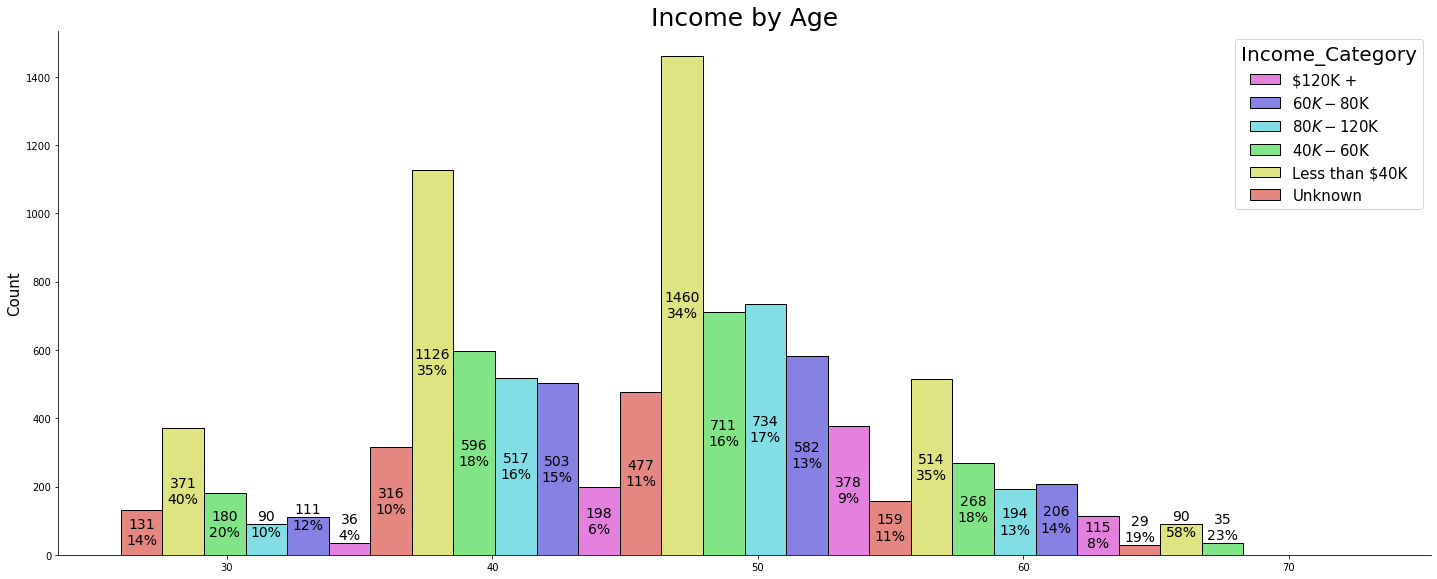

In [110]:
sns_bar(df, x='age', hue='income_category', bins = 5, title='Income by Age', show_labels=True, percent=True, 
        legend_title='Income_Category', height=8, aspect=2.5, palette=sns.color_palette("hls", len(incs)), hue_labels=incs)

# END